<p style="color: darkblue; font-size: 35px; text-align: center;"><b>Webscraping Project</b></p>
<p style="color: darkblue; font-size: 25px; text-align: center;">VN Stock Market Mining</p>
<p style="font-size: 15px; text-align: center;">
Developed By: Tram Anh Hoang (477224) & Trang Hoang (476929) </p>

## 1. Executive Summary
In emerging markets such as Vietnam, timely and accurate access to financial data is a significant challenge for investors, analysts, and asset managers. This project was developed to address the inefficiencies in data retrieval by implementing a scalable and ethical web scraping system. By targeting key financial websites and employing advanced scraping techniques, the project successfully extracted structured data for over 1,500 publicly listed stocks. The resulting dataset provides a solid foundation for various financial applications, including equity screening, trend analysis, and portfolio modeling.

This report presents a webscraping-based framework developed to systematically extract and consolidate financial data for over 1,500 companies listed on Vietnam's stock exchanges. The project automates the retrieval of company fundamentals, historical metrics, dividend history, and trading summaries using a hybrid approach combining `Selenium` and `BeautifulSoup`. The result is a structured, multi-year dataset ready for financial modeling, screening, or investment research. Ethical scraping techniques and scalable Python architecture ensure reliability and compliance with academic standards.


## 2. Introduction

### 2.1. Background & Context

Vietnam's stock market has attracted increasing attention due to its rapid economic growth and integration into global trade. However, accessing quality financial data remains a key limitation for analysts and investors. Unlike developed markets where data is typically aggregated through centralized APIs or databases (e.g., Bloomberg, Yahoo Finance), Vietnamese data is fragmented across multiple websites with minimal machine-readability.

### 2.1. Motivation

Manually collecting financial data from various sources is inefficient and error-prone. The need to track multiple financial indicators across more than 1,500 publicly listed companies only amplifies the burden. Recognizing this bottleneck, we sought to automate this process through webscraping—a widely used and effective method for transforming web content into analyzable datasets.

By leveraging open-source technologies and public websites, we aimed to replicate the value of commercial data platforms while maintaining academic and ethical integrity.

### 2.3. Project Objectives

The primary objectives of this project include:

- Automating the extraction of stock-level data from public financial websites
- Structuring raw content into machine-readable, analysis-ready datasets
- Ensuring scalability and maintainability via modular code and ethical threading
- Consolidating diverse metrics (valuation, dividends, financial health) into a single source for downstream applications


In essence, the scraper acts as a bridge between raw, scattered web data and the structured requirements of modern financial analysis.


## 3. Methodology

### 3.1. Data Source Selection and Structure

Two major online financial portals were selected as primary data sources:

- **CafeF Screener** ([https://cafef.vn/du-lieu/screener.aspx#data](https://cafef.vn/du-lieu/screener.aspx#data)): Known for its robust database of Vietnamese equities and market indices, it offers a structured screener tool that displays company fundamentals in a table format.
  
- **Cophieu68.vn** ([https://www.cophieu68.vn/quote/summary.php?id=ACC/](https://www.cophieu68.vn/quote/summary.php?id=ACC/)) & ([https://www.cophieu68.vn/event/events.php](https://www.cophieu68.vn/event/events.php/)): which offers deeper company-level financial metrics on individual pages. Its layout is more dynamic and relies on JavaScript, making it a more complex scraping target.

Both websites are publicly accessible, do not require login, and display information in semi-structured HTML formats—ideal for a hybrid scraping workflow.

### 3.2 Legal & Ethical Compliance

Webscraping can raise ethical concerns, especially when improperly implemented. We adhered to academic scraping norms by:

- **Public Access Only**: The scraper interacted exclusively with publicly available pages. No login credentials, paywalls, or API keys were used or bypassed. An inspection of both platforms’ `robots.txt` files — [https://cafef.vn/robots.txt](https://cafef.vn/robots.txt) and [https://www.cophieu68.vn/robots.txt](https://www.cophieu68.vn/robots.txt) — confirms that there are no restrictions placed on crawling the sections containing financial data, such as stock prices, financial reports, and technical indicators. Moreover, the terms of use do not explicitly prohibit automated access for non-commercial, research, or academic purposes.

- **Respectful Scraping**: The script simulated real-user behavior by implementing delays between requests and user-agent headers, Limiting concurrent requests using `ThreadPool` to avoid overloading the servers. These techniques were applied to prevent unnecessary load on source platforms and to ensure scraping activity remained unobtrusive.

- **Academic Use Only**: Data was neither redistributed nor monetized. The entire effort is solely intended for educational, analytical, and non-commercial use. No personal information or user-specific data was collected, and all scraped content is used exclusively for study and presentation purposes.

- **Transparency**: Source citations were maintained, and original page structures were preserved during data extraction to ensure traceability. Every data point collected can be cross-referenced with its original source, ensuring both integrity and reproducibility of the dataset.

This approach reflects adherence to responsible data practices and mitigates legal risks often associated with unauthorized scraping. By validating robots.txt permissions and respecting platform usage policies, the project demonstrates a commitment to lawful, ethical, and research-oriented scraping.

### 3.3 Technology Stack and Strategic Design Choices

The project was implemented in Python using a hybrid scraping model that integrates Selenium for dynamic page rendering and user simulation with BeautifulSoup for fast and flexible HTML parsing. This ensures compatibility with JavaScript-heavy sites while preserving parsing performance.

| Library/Tool                  | Purpose |
|-------------------------------|---------|
| `Selenium`                    | Automates browser interactions (e.g., tab clicks, consent dialogs, ad popups). |
| `BeautifulSoup`              | Parses HTML from rendered pages and extracts structured data. |
| `pandas`                      | Constructs, cleans, and exports tabular datasets. |
| `tqdm`                        | Displays progress bars for tracking long scraping loops. |
| `concurrent.futures.ThreadPoolExecutor` | Enables safe and parallelized scraping for scale. |
| `time`, `random`, `re`        | Introduces ethical scraping delays, regex-based cleaning, and format normalization. |
| `matplotlib`, `seaborn`       | Creates visualizations for data validation and exploratory analysis. |

The hybrid approach allowed the scraper to reliably access dynamically rendered content, such as financial reports and event tables. Modular design, including utility functions for ads and consent handling, made the system robust and reusable.



## 4. Implementation Strategy

### 4.1 Multi-layered Scraping

The scraping pipeline was divided into several distinct phases:

1. **Symbol Extraction**: Scraped from CafeF's stock screener table using Selenium-rendered HTML and parsed via BeautifulSoup.
2. **Company Financials**: Accessed through Cophieu68's financial tabs using tab navigation automation and custom data extraction logic.
3. **Dividend Events**: Collected from paginated event pages, with retry mechanisms for failed pages.
4. **Error Logging and Retry**: All failures were logged, parsed, and selectively retried using structured error message handling.

The use of multithreading (`max_workers=5`) helped process over 1,500 stocks within a few hours without compromising ethical constraints.



#### 0. Environment Setting Up

In [3]:
# Install Necessary Libraries
#!pip install pandas numpy selenium requests beautifulsoup4 tqdm

In [4]:
# Set Up Chrome Web Driver and Necesssary Libraries
import os
import pickle
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from tqdm import tqdm
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import TimeoutException, NoSuchElementException, ElementNotInteractableException
from selenium.webdriver.chrome.options import Options
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed
import random
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Set Up Utility Function for Saving and Loading Objects

def save_object(obj, filename, folder="objects"):
    try:
        Path(folder).mkdir(parents=True, exist_ok=True)
        if not filename.endswith('.pkl'):
            filename += '.pkl'
        file_path = Path(folder) / filename
        with open(file_path, 'wb') as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print(f"[!] Error saving object '{filename}': {e}")

def load_object(filename, folder="objects"):
    try:
        if not filename.endswith('.pkl'):
            filename += '.pkl'
        file_path = Path(folder) / filename
        with open(file_path, 'rb') as f:
            return pickle.load(f)
    except Exception as e:
        print(f"[!] Error loading object '{filename}': {e}")
        return None

#### Phase 1. **Symbol Extraction**

The first phase was to obtain a complete list of stock tickers and basic metadata from the CafeF screener table.

- **Why Selenium was used**: The CafeF screener page loads its content dynamically using JavaScript. Static `requests.get()` would not capture the rendered table. Thus, Selenium was used to **load the page**, **wait for full content rendering**, and then **pass the page source to BeautifulSoup** for efficient parsing.

- **What was extracted**:  
  - Stock Symbol  
  - Company Name  
  - Trading Floor  
  - Market Price  
  - EPS  
  - P/E Ratio  
  - Company Link

- **How**: Each table row (`<tr>`) was parsed manually using BeautifulSoup, ensuring control over variable HTML formatting and enabling the exclusion of irrelevant rows.


In [4]:
# Set Up CafeF Scraper
def scrape_cafef_stocks(output_csv="cafef_stocks.csv", headless=False):
    # Set up Chrome options
    options = webdriver.ChromeOptions()
    if headless:
        options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--window-size=1920,1080")
    options.add_argument(
        "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
    )

    # Initialize data containers
    cafef = []
    saved_symbols = []
    error_count = 0
    
    start_time = time.time()

    # Start WebDriver
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    try:
        url = "https://cafef.vn/du-lieu/screener.aspx#data"
        driver.get(url)
        driver.implicitly_wait(30)

        # Parse page
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        rows = soup.find_all("tr")

        print(f"🔍 Total HTML rows found: {len(rows)}")

        for idx, row in enumerate(rows):
            try:
                stock_symbol_element = row.find("td", class_="symbol")
                if not stock_symbol_element:
                    continue

                stock_symbol_tag = stock_symbol_element.find("a")
                stock_symbol = stock_symbol_tag.text.strip() if stock_symbol_tag else None
                if not stock_symbol:
                    continue

                company_name_element = row.find("td", class_="name")
                if company_name_element:
                    company_tag = company_name_element.find("a")
                    company_name = company_tag.text.strip() if company_tag else None
                    company_link = (
                        f"https://cafef.vn{company_tag['href']}"
                        if company_tag and "/du-lieu/" in company_tag.get("href", "")
                        else None
                    )
                else:
                    company_name = company_link = None

                trading_floor = row.find("td", class_="center")
                market_price = row.find("td", class_="right t_price")
                market_cap = row.find("td", class_="right vh")
                eps = row.find("td", class_="right t_eps")
                pe_ratio = row.find("td", class_="right t_pe")

                stock_data_point = {
                    "Stock Symbol": stock_symbol,
                    "Company Name": company_name,
                    "Company Link": company_link,
                    "Trading Floor": trading_floor.text.strip() if trading_floor else None,
                    "Market Price": market_price.text.strip() if market_price else None,
                    "Market Capitalization": market_cap.text.strip() if market_cap else None,
                    "EPS": eps.text.strip() if eps else None,
                    "P/E Ratio": pe_ratio.text.strip() if pe_ratio else None
                }

                save_object(stock_data_point, f"{stock_symbol}.pkl")
                cafef.append(stock_data_point)
                saved_symbols.append(stock_symbol)

            except Exception as e:
                print(f"[Row {idx}] ❌ Error processing row: {e}")
                error_count += 1
                continue

    finally:
        driver.quit()

    # Output summary
    end_time = time.time()
    print(f"\n✅ Scraping completed in {end_time - start_time:.2f} seconds.")
    print(f"📦 Total stock rows scraped and saved: {len(cafef)}")

    if saved_symbols:
        print(f"✅ Saved {len(saved_symbols)} objects.")
        if len(saved_symbols) > 10:
            print(f"📄 Symbols saved (sample): {', '.join(saved_symbols[:10])}... [+{len(saved_symbols) - 10} more]")
        else:
            print(f"📄 Symbols saved: {', '.join(saved_symbols)}")

    if error_count:
        print(f"⚠️ Rows skipped due to errors: {error_count}")

    # Save to CSV and Pickle
    df_symbol = pd.DataFrame(cafef)
    
    output_folder = "output_files"
    csv_path = os.path.join(output_folder, output_csv)
    pkl_path = csv_path.replace('.csv', '.pkl')

    # Save as CSV
    df_symbol.to_csv(csv_path, index=False)
    print(f"📁 Data saved to CSV file: '{csv_path}'")

    # Save as Pickle
    df_symbol.to_pickle(pkl_path)
    print(f"📁 Data also saved to Pickle file: '{pkl_path}'")

    return df_symbol

df_symbol = scrape_cafef_stocks(headless=True)

🔍 Total HTML rows found: 1574

✅ Scraping completed in 34.43 seconds.
📦 Total stock rows scraped and saved: 1572
✅ Saved 1572 objects.
📄 Symbols saved (sample): A32, AAA, AAH, AAM, AAS, AAT, AAV, ABB, ABC, ABI... [+1562 more]
📁 Data saved to CSV file: 'output_files\cafef_stocks.csv'
📁 Data also saved to Pickle file: 'output_files\cafef_stocks.pkl'


In [21]:
# Display Dataframe of Symbol Extraction
df_symbol.head(10)

,Stock Symbol,Company Name,Company Link,Trading Floor,Market Price,Market Capitalization,EPS,P/E Ratio
0,A32,Công ty cổ phần 32,https://cafef.vn/du-lieu/upcom/a32-cong-ty-co-...,UpCom,37.00,"2,516.00",2.57,14.38
1,AAA,Công ty Cổ phần Nhựa An Phát Xanh,https://cafef.vn/du-lieu/hose/aaa-cong-ty-co-p...,HSX,7.40,"2,828.83",0.18,40.53
2,AAH,Công ty cổ phần Hợp Nhất,https://cafef.vn/du-lieu/upcom/aah-cong-ty-co-...,UpCom,4.00,0.00,0.00,0.00
3,AAM,Công ty Cổ phần Thủy sản Mekong,https://cafef.vn/du-lieu/hose/aam-cong-ty-co-p...,HSX,6.90,72.11,0.73,9.49
4,AAS,Công ty cổ phần Chứng khoán SmartInvest,https://cafef.vn/du-lieu/upcom/aas-cong-ty-co-...,UpCom,7.30,"1,460.00",1.99,3.67
5,AAT,Công ty Cổ phần Tập đoàn Tiên Sơn Thanh Hóa,https://cafef.vn/du-lieu/hose/aat-cong-ty-co-p...,HSX,2.79,197.59,0.07,42.85
6,AAV,Công ty Cổ phần AAV Group,https://cafef.vn/du-lieu/hastc/aav-cong-ty-co-...,HNX,6.50,448.42,-0.16,-39.91
7,ABB,Ngân hàng Thương mại cổ phần An Bình,https://cafef.vn/du-lieu/upcom/abb-ngan-hang-t...,UpCom,7.20,"7,452.26",1.47,4.88
8,ABC,Công ty cổ phần Truyền thông VMG,https://cafef.vn/du-lieu/upcom/abc-cong-ty-co-...,UpCom,10.10,205.97,35.62,0.28
9,ABI,Công ty Cổ phần Bảo hiểm Ngân hàng Nông nghiệp,https://cafef.vn/du-lieu/upcom/abi-cong-ty-co-...,UpCom,26.80,"1,381.74",3.23,8.29


#### Phase 2. **Company Financials (Cophieu68)**

Once the symbol list was collected, each stock’s detailed financial data was retrieved from Cophieu68 using a combination of:

- **URL pattern logic** to construct stock-specific links
- **Selenium tab interaction** to navigate to the “Báo cáo tài chính” (Financial Report) tab
- **BeautifulSoup parsing** after content loading

Key technical challenges addressed:
- Handling delayed tab content with `WebDriverWait`
- Navigating deeply nested tables of multi-year financial metrics
- Converting Vietnamese-formatted numeric values (e.g., `1.000,25`) to standard floats
- Filtering relevant metrics using a dictionary (`metric_mapping`) to ensure consistency across symbols

Each company’s financial report was converted into a structured list of year-wise entries and stored as serialized `.pkl` files for future reuse or batch exports.



In [6]:
# Set Up Utility Functions for Ads and Consent Handling
def handle_ads(driver):
    """
    Close any ads on the page, including those triggered by #google_vignette.
    """
    ad_selectors = [
        "//div[@class='ns-yjth1-e-19 button-common close-button milo-animation delay-4']",
        "//div[@id='dismiss-button']"
    ]
    # Check if the URL contains '#google_vignette' (ad page)
    current_url = driver.current_url
    if "#google_vignette" in current_url:
        try:  
            close_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, "//div[@id='dismiss-button']"))
            )
            driver.execute_script("arguments[0].click();", close_button) 
            print("✅ Ad closed.")
            return  # Exit after handling the ad
        except TimeoutException:
            print("❌ Close button not found. Refreshing the page...")
            clean_url = current_url.split("#")[0]  
            driver.get(clean_url)  # Reload the clean URL
            time.sleep(random.uniform(1.5, 3.5))  
            return  
    # Handle other types of ads using predefined selectors
    for selector in ad_selectors:
        try:
            # Wait for ads to appear
            WebDriverWait(driver, 5).until(
                EC.presence_of_all_elements_located((By.XPATH, selector))
            )
            close_ad_buttons = driver.find_elements(By.XPATH, selector)
            for ad in close_ad_buttons:
                if ad.is_displayed():
                    ad.click()                    
            break  
        except Exception:
            pass

def handle_consent(driver):
    """Click cookie consent if it appears."""
    consent_button_xpaths = [
        "//p[@class='fc-button-label' and text()='Consent']",
        "//button[contains(text(), 'Accept')]",
        "//button[contains(text(), 'Agree')]"
    ]
    for xpath in consent_button_xpaths:
        try:
            consent_button = WebDriverWait(driver, 3).until(
                EC.visibility_of_element_located((By.XPATH, xpath))
            )
            driver.execute_script("arguments[0].click();", consent_button)  # Use JS click to bypass overlays           
            return  
        except Exception:
            pass


In [7]:
# Set Up Financial Data Scraper
def scrape_symbol(symbol, year_range, metric_mapping):
    driver = None
    max_retries = 2
    attempt = 0
    success = False

    try:
        # Check if summary and financial files already exist
        summary_file = os.path.join("stock_index", f"{symbol}_summary.pkl")
        financial_file = os.path.join("stock_index", f"{symbol}_financial.pkl")
        if os.path.exists(summary_file) and os.path.exists(financial_file):
            with open(summary_file, 'rb') as f1, open(financial_file, 'rb') as f2:
                summary = pickle.load(f1)
                financial_rows = pickle.load(f2)
            return summary, financial_rows, None  # No error

        # Initialize WebDriver for this thread
        options = webdriver.ChromeOptions()
        options.add_argument("--headless")
        options.add_argument("--disable-gpu")
        options.add_argument("--no-sandbox")
        options.add_argument("--window-size=1920,1080")
        options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")
        driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

        while attempt < max_retries and not success:
            try:
                # Construct the direct URL for the symbol
                url = f"https://www.cophieu68.vn/quote/summary.php?id={symbol.lower()}"
                driver.get(url)

                # Handle ads (including #google_vignette) and consent                
                
                handle_consent(driver)
                handle_ads(driver)
                

                # Wait for the summary data to load
                WebDriverWait(driver, 6).until(EC.presence_of_element_located((By.CLASS_NAME, "flex_detail")))
                soup = BeautifulSoup(driver.page_source, 'html.parser')

                # Extract summary data
                highest_price = soup.select_one("#stockname_price_highest").text.strip()
                reference_price = soup.select_one("div.flex_detail.bold > div").text.strip()
                lowest_price = soup.select_one("#stockname_price_lowest").text.strip()
                volume = soup.select_one("#stockname_volume").get("data-value", "").strip()

                summary = {
                    "Stock Symbol": symbol,
                    "Highest Price": highest_price,
                    "Reference Price": reference_price,
                    "Lowest Price": lowest_price,
                    "Volume": volume
                }

                # Navigate to financial tab
                financial_tab = WebDriverWait(driver, 6).until(
                    EC.presence_of_element_located((By.XPATH, "//a[contains(text(),'Báo cáo tài chính')]"))
                )
                driver.execute_script("arguments[0].click();", financial_tab)
                
                WebDriverWait(driver, 6).until(EC.presence_of_element_located((By.ID, "financial_indexes")))
                handle_ads(driver)
                soup = BeautifulSoup(driver.page_source, 'html.parser')
                table = soup.find("table", id="financial_indexes")

                financial_rows = []
                if table:
                    header_row = table.find("tr", class_="tr_header")
                    headers = [h.text.strip() for h in header_row.find_all("td")]
                    years = [h.split(" ")[1] for h in headers if h.startswith("Năm") and h.split(" ")[1] in year_range]
                    rows = table.select("tr.financial, tr.financial_bold, tr.financial_main_bold")
                    for row in rows:
                        cells = row.find_all("td")
                        metric = cells[0].text.strip()
                        if metric not in metric_mapping:
                            continue
                        data_point = {"Stock Symbol": symbol, "Metric": metric_mapping[metric]}
                        for i, year in enumerate(years):
                            data_point[year] = cells[i + 1].text.strip() if i + 1 < len(cells) else "N/A"
                        financial_rows.append(data_point)

                # Save objects
                save_object(summary, f"{symbol}_summary")
                save_object(financial_rows, f"{symbol}_financial")

                success = True  # Mark as successful
                time.sleep(random.uniform(0.5, 1.2))  # Reduced delay after successful scrape

            except Exception as e:
                attempt += 1
                if attempt == max_retries:
                    # Log the symbol for future reprocessing
                    error_message = f"❌ Error scraping {symbol} after {max_retries} attempts: {e}"
                    print(error_message)
                    return None, None, error_message  # Return error message for logging
                else:
                    retry_delay = random.uniform(1.5, 3.5)  # Random delay between 1.5 and 3.5 seconds
                    time.sleep(retry_delay)

        return summary, financial_rows, None  # No error

    finally:
        if driver:
            driver.quit()

In [ ]:
# Configurations of Main Script
print("🧪 Running in desktop headless mode")

year_range = [str(y) for y in range(2019, 2025)]
metric_mapping = {
    "Giá / Giá sổ sách (PB)": "PB Ratio",
    "15/ Lợi nhuận trước thuế/Tổng tài sản (ROA)": "ROA",
    "16/ Lợi nhuận sau thuế/Vốn chủ sở hữu (ROE)": "ROE",
    "Tăng trưởng doanh thu": "Revenue Growth",
    "Tăng trưởng Lợi nhuận": "Profit Growth",
    "4/ Nợ phải trả/Vốn chủ sở hữu": "Debt to Equity Ratio"
}

symbols = list(df_symbol['Stock Symbol'].dropna().unique())
stock_summaries, financial_data, skipped_symbols, error_symbols = [], [], [], []

# --- Logging failed symbols ---
failed_log_path = "failed_symbols.txt"
Path(failed_log_path).write_text("", encoding='utf-8')  # Clear log

start_time = time.time()

# --- Parallel Scraping ---
with ThreadPoolExecutor(max_workers=5) as executor:
    futures = [executor.submit(scrape_symbol, symbol, year_range, metric_mapping) for symbol in symbols]
    progress_bar = tqdm(as_completed(futures), total=len(symbols), desc="Scraping symbols", unit="symbol")
    
    for future in progress_bar:
        summary, financial_rows, failed_symbol = future.result()
        if failed_symbol:
            error_symbols.append(failed_symbol)
            with open(failed_log_path, 'a', encoding='utf-8') as log_file:
                log_file.write(f"{failed_symbol}\n")
        elif summary and financial_rows:
            stock_summaries.append(summary)
            financial_data.extend(financial_rows)

# --- Save Output ---
df_summary = pd.DataFrame(stock_summaries)
df_financial = pd.DataFrame(financial_data)

output_folder = "output_files"
Path(output_folder).mkdir(exist_ok=True)

# Save Pickle using utility function
save_object(df_summary, "stock_summary", folder=output_folder)
save_object(df_financial, "financial_all", folder=output_folder)

# Save CSV
df_summary.to_csv(Path(output_folder) / "stock_summary.csv", index=False, encoding='utf-8')
df_financial.to_csv(Path(output_folder) / "financial_data.csv", index=False, encoding='utf-8')

# --- Summary Report ---
print("\n✅ Done.")
print(f"🔢 Total summaries: {len(df_summary)} | Total financial rows: {len(df_financial)}")
print(f"📦 Skipped symbols (already existed): {len(skipped_symbols)}")
print(f"⚠️ Failed symbols: {len(error_symbols)} (see {failed_log_path})")
print(f"🕒 Total time: {time.time() - start_time:.2f} seconds")

🧪 Running in desktop headless mode


Scraping symbols:  57%|████████████████████████████████▋                        | 900/1572 [01:00<00:33, 19.77symbol/s]

❌ Error scraping MBT after 2 attempts: Message: 
Stacktrace:
	GetHandleVerifier [0x0109C7F3+24435]
	(No symbol) [0x01022074]
	(No symbol) [0x00EF06E3]
	(No symbol) [0x00F38B39]
	(No symbol) [0x00F38E8B]
	(No symbol) [0x00F81AC2]
	(No symbol) [0x00F5D804]
	(No symbol) [0x00F7F20A]
	(No symbol) [0x00F5D5B6]
	(No symbol) [0x00F2C54F]
	(No symbol) [0x00F2D894]
	GetHandleVerifier [0x013A70A3+3213347]
	GetHandleVerifier [0x013BB0C9+3295305]
	GetHandleVerifier [0x013B558C+3271948]
	GetHandleVerifier [0x01137360+658144]
	(No symbol) [0x0102B27D]
	(No symbol) [0x01028208]
	(No symbol) [0x010283A9]
	(No symbol) [0x0101AAC0]
	BaseThreadInitThunk [0x770C5D49+25]
	RtlInitializeExceptionChain [0x77BDCF0B+107]
	RtlGetAppContainerNamedObjectPath [0x77BDCE91+561]



Scraping symbols:  63%|██████████████████████████████████▊                    | 995/1572 [11:43<2:31:41, 15.77s/symbol]

❌ Error scraping PTN after 2 attempts: Message: 
Stacktrace:
	GetHandleVerifier [0x0109C7F3+24435]
	(No symbol) [0x01022074]
	(No symbol) [0x00EF06E3]
	(No symbol) [0x00F38B39]
	(No symbol) [0x00F38E8B]
	(No symbol) [0x00F81AC2]
	(No symbol) [0x00F5D804]
	(No symbol) [0x00F7F20A]
	(No symbol) [0x00F5D5B6]
	(No symbol) [0x00F2C54F]
	(No symbol) [0x00F2D894]
	GetHandleVerifier [0x013A70A3+3213347]
	GetHandleVerifier [0x013BB0C9+3295305]
	GetHandleVerifier [0x013B558C+3271948]
	GetHandleVerifier [0x01137360+658144]
	(No symbol) [0x0102B27D]
	(No symbol) [0x01028208]
	(No symbol) [0x010283A9]
	(No symbol) [0x0101AAC0]
	BaseThreadInitThunk [0x770C5D49+25]
	RtlInitializeExceptionChain [0x77BDCF0B+107]
	RtlGetAppContainerNamedObjectPath [0x77BDCE91+561]



Scraping symbols:  66%|███████████████████████████████████▌                  | 1036/1572 [18:41<1:10:41,  7.91s/symbol]

❌ Error scraping PRE after 2 attempts: Message: 
Stacktrace:
	GetHandleVerifier [0x0109C7F3+24435]
	(No symbol) [0x01022074]
	(No symbol) [0x00EF06E3]
	(No symbol) [0x00F38B39]
	(No symbol) [0x00F38E8B]
	(No symbol) [0x00F81AC2]
	(No symbol) [0x00F5D804]
	(No symbol) [0x00F7F20A]
	(No symbol) [0x00F5D5B6]
	(No symbol) [0x00F2C54F]
	(No symbol) [0x00F2D894]
	GetHandleVerifier [0x013A70A3+3213347]
	GetHandleVerifier [0x013BB0C9+3295305]
	GetHandleVerifier [0x013B558C+3271948]
	GetHandleVerifier [0x01137360+658144]
	(No symbol) [0x0102B27D]
	(No symbol) [0x01028208]
	(No symbol) [0x010283A9]
	(No symbol) [0x0101AAC0]
	BaseThreadInitThunk [0x770C5D49+25]
	RtlInitializeExceptionChain [0x77BDCF0B+107]
	RtlGetAppContainerNamedObjectPath [0x77BDCE91+561]



Scraping symbols:  80%|████████████████████████████████████████████▌           | 1250/1572 [46:50<48:12,  8.98s/symbol]

❌ Error scraping TDI after 2 attempts: Message: 
Stacktrace:
	GetHandleVerifier [0x0109C7F3+24435]
	(No symbol) [0x01022074]
	(No symbol) [0x00EF06E3]
	(No symbol) [0x00F38B39]
	(No symbol) [0x00F38E8B]
	(No symbol) [0x00F81AC2]
	(No symbol) [0x00F5D804]
	(No symbol) [0x00F7F20A]
	(No symbol) [0x00F5D5B6]
	(No symbol) [0x00F2C54F]
	(No symbol) [0x00F2D894]
	GetHandleVerifier [0x013A70A3+3213347]
	GetHandleVerifier [0x013BB0C9+3295305]
	GetHandleVerifier [0x013B558C+3271948]
	GetHandleVerifier [0x01137360+658144]
	(No symbol) [0x0102B27D]
	(No symbol) [0x01028208]
	(No symbol) [0x010283A9]
	(No symbol) [0x0101AAC0]
	BaseThreadInitThunk [0x770C5D49+25]
	RtlInitializeExceptionChain [0x77BDCF0B+107]
	RtlGetAppContainerNamedObjectPath [0x77BDCE91+561]



Scraping symbols:  88%|███████████████████████████████████████████████▌      | 1383/1572 [1:05:21<28:17,  8.98s/symbol]

❌ Error scraping TOT after 2 attempts: Message: 
Stacktrace:
	GetHandleVerifier [0x0109C7F3+24435]
	(No symbol) [0x01022074]
	(No symbol) [0x00EF06E3]
	(No symbol) [0x00F38B39]
	(No symbol) [0x00F38E8B]
	(No symbol) [0x00F81AC2]
	(No symbol) [0x00F5D804]
	(No symbol) [0x00F7F20A]
	(No symbol) [0x00F5D5B6]
	(No symbol) [0x00F2C54F]
	(No symbol) [0x00F2D894]
	GetHandleVerifier [0x013A70A3+3213347]
	GetHandleVerifier [0x013BB0C9+3295305]
	GetHandleVerifier [0x013B558C+3271948]
	GetHandleVerifier [0x01137360+658144]
	(No symbol) [0x0102B27D]
	(No symbol) [0x01028208]
	(No symbol) [0x010283A9]
	(No symbol) [0x0101AAC0]
	BaseThreadInitThunk [0x770C5D49+25]
	RtlInitializeExceptionChain [0x77BDCF0B+107]
	RtlGetAppContainerNamedObjectPath [0x77BDCE91+561]



Scraping symbols:  98%|█████████████████████████████████████████████████████ | 1543/1572 [1:25:11<03:01,  6.27s/symbol]

❌ Error scraping VTT after 2 attempts: Message: 
Stacktrace:
	GetHandleVerifier [0x0109C7F3+24435]
	(No symbol) [0x01022074]
	(No symbol) [0x00EF06E3]
	(No symbol) [0x00F38B39]
	(No symbol) [0x00F38E8B]
	(No symbol) [0x00F81AC2]
	(No symbol) [0x00F5D804]
	(No symbol) [0x00F7F20A]
	(No symbol) [0x00F5D5B6]
	(No symbol) [0x00F2C54F]
	(No symbol) [0x00F2D894]
	GetHandleVerifier [0x013A70A3+3213347]
	GetHandleVerifier [0x013BB0C9+3295305]
	GetHandleVerifier [0x013B558C+3271948]
	GetHandleVerifier [0x01137360+658144]
	(No symbol) [0x0102B27D]
	(No symbol) [0x01028208]
	(No symbol) [0x010283A9]
	(No symbol) [0x0101AAC0]
	BaseThreadInitThunk [0x770C5D49+25]
	RtlInitializeExceptionChain [0x77BDCF0B+107]
	RtlGetAppContainerNamedObjectPath [0x77BDCE91+561]



Scraping symbols:  99%|█████████████████████████████████████████████████████▋| 1562/1572 [1:27:32<01:20,  8.04s/symbol]

❌ Error scraping XDC after 2 attempts: Message: 
Stacktrace:
	GetHandleVerifier [0x0109C7F3+24435]
	(No symbol) [0x01022074]
	(No symbol) [0x00EF06E3]
	(No symbol) [0x00F38B39]
	(No symbol) [0x00F38E8B]
	(No symbol) [0x00F81AC2]
	(No symbol) [0x00F5D804]
	(No symbol) [0x00F7F20A]
	(No symbol) [0x00F5D5B6]
	(No symbol) [0x00F2C54F]
	(No symbol) [0x00F2D894]
	GetHandleVerifier [0x013A70A3+3213347]
	GetHandleVerifier [0x013BB0C9+3295305]
	GetHandleVerifier [0x013B558C+3271948]
	GetHandleVerifier [0x01137360+658144]
	(No symbol) [0x0102B27D]
	(No symbol) [0x01028208]
	(No symbol) [0x010283A9]
	(No symbol) [0x0101AAC0]
	BaseThreadInitThunk [0x770C5D49+25]
	RtlInitializeExceptionChain [0x77BDCF0B+107]
	RtlGetAppContainerNamedObjectPath [0x77BDCE91+561]



Scraping symbols: 100%|██████████████████████████████████████████████████████| 1572/1572 [1:28:35<00:00,  3.38s/symbol]


✅ Done.
🔢 Total summaries: 1565 | Total financial rows: 9390
📦 Skipped symbols (already existed): 0
⚠️ Failed symbols: 7 (see failed_symbols.txt)
🕒 Total time: 5315.76 seconds


**Error Logging and Retry Mechanism**

Given the complexity of scraping across dynamic and occasionally unstable sources, a robust logging and retry system was critical:

- **Failed symbols** were recorded in `failed_symbols.txt`, along with contextual error messages
- **Stack traces were parsed** to distinguish between real failures and false negatives (e.g., stock delisted, not found)
- A dedicated function, `retry_failed_symbols()`, reattempted failed entries while skipping confirmed invalid stocks
- Similarly, failed event pages were tracked and reprocessed using `retry_failed_pages()`

This system reduced total failure rates and ensured data completeness without re-running the full pipeline.


In [ ]:
# Define Retry Function for Failed Symbols
def retry_failed_symbols(year_range, metric_mapping):    
    failed_log_path = "failed_symbols.txt"

    if not os.path.exists(failed_log_path):
        print("⚠️ No failed symbols found in the log file.")
        return

    symbols_to_retry = set()
    skip_symbols = set()

    # Read log file
    with open(failed_log_path, 'r', encoding='utf-8') as log_file:
        lines = log_file.readlines()

    # Parse log file to extract failed symbols
    i = 0
    while i < len(lines):
        line = lines[i].strip()

        if line.startswith("❌ Error scraping"):
            match = re.search(r"Error scraping (\w+)", line)
            if match:
                symbol = match.group(1)

                if symbol in symbols_to_retry or symbol in skip_symbols:
                    i += 1
                    continue

                # Extract stack trace block
                stack_trace_block = []
                j = i + 1
                while j < len(lines):
                    stack_trace_line = lines[j].strip()
                    stack_trace_block.append(stack_trace_line)
                    if "RtlGetAppContainerNamedObjectPath" in stack_trace_line:
                        break
                    j += 1

                # Determine whether to skip or retry
                if any("(No symbol)" in trace for trace in stack_trace_block):
                    skip_symbols.add(symbol)
                else:
                    symbols_to_retry.add(symbol)

                i = j + 1  # Skip stack trace block
                continue

        i += 1

    print(f"\n🔄 Re-running {len(symbols_to_retry)} failed symbols...")

    # Retry scraping
    stock_summaries, financial_data, error_symbols = [], [], []
    start_time = time.time()

    for symbol in tqdm(sorted(symbols_to_retry), desc="Processing failed symbols", unit="symbol"):
        summary, financial_rows, error_message = scrape_symbol(symbol, year_range, metric_mapping)

        if error_message:
            error_symbols.append(symbol)
            with open(failed_log_path, 'a', encoding='utf-8') as log_file:
                log_file.write(f"{error_message}\n")
        elif summary and financial_rows:
            stock_summaries.append(summary)
            financial_data.extend(financial_rows)

    # Load existing data if available
    try:
        df_summary_existing = load_object("stock_summary")
        df_financial_existing = load_object("financial_all")
    except FileNotFoundError:
        df_summary_existing = pd.DataFrame()
        df_financial_existing = pd.DataFrame()

    # Combine new and existing data
    df_summary_new = pd.DataFrame(stock_summaries)
    df_financial_new = pd.DataFrame(financial_data)

    df_summary_combined = pd.concat([df_summary_existing, df_summary_new], ignore_index=True)
    df_financial_combined = pd.concat([df_financial_existing, df_financial_new], ignore_index=True)

    # Save results
    save_object(df_summary_combined, "stock_summary")
    save_object(df_financial_combined, "financial_all")

    df_summary_combined.to_csv("stock_summary.csv", index=False, encoding='utf-8')
    df_financial_combined.to_csv("financial_data.csv", index=False, encoding='utf-8')

    # Final report
    print("\n✅ Retry Done.")
    print(f"🔢 Total summaries (retry): {len(df_summary_new)} | Total financial rows (retry): {len(df_financial_new)}")
    print(f"⚠️ Symbols that do not exist on Cophieu68: {len(skip_symbols)}")
    print(f"⚠️ Still failed symbols: {len(error_symbols)}")
    print(f"🕒 Total time: {time.time() - start_time:.2f} seconds")

retry_failed_symbols(year_range, metric_mapping)


🔄 Re-running 0 failed symbols...


Processing failed symbols: 0symbol [00:00, ?symbol/s]


✅ Retry Done.
🔢 Total summaries (retry): 0 | Total financial rows (retry): 0
⚠️ Symbols that do not exist on Cophieu68: 7
⚠️ Still failed symbols: 0
🕒 Total time: 0.10 seconds


In [ ]:
# Display Dataframe of Summary Data
df_summary.head(10)

,Stock Symbol,Highest Price,Reference Price,Lowest Price,Volume
0,AAH,4.10,4.10,4.00,1590200.0
1,ABC,12.00,11.70,11.40,14600.0
2,A32,37.50,37.50,37.50,0.0
3,AAV,6.70,6.50,6.50,405800.0
4,ABB,7.90,7.90,7.70,1491600.0
5,AAM,7.00,6.87,6.88,22200.0
6,AAS,8.50,8.60,8.40,399500.0
7,AAA,8.51,8.42,8.42,1494000.0
8,AAT,3.24,3.24,3.19,76800.0
9,ABI,28.20,28.10,27.90,4500.0


In [20]:
# Display Dataframe of Financial Data
df_financial.head(10)

,Stock Symbol,Metric,2024,2023,2022,2021,2020,2019
0,AAV,PB Ratio,0.66 (lần),0.36 (lần),0.37 (lần),1.04 (lần),1.04 (lần),0.63 (lần)
1,AAV,Debt to Equity Ratio,21.81%,17.72%,33.44%,22.96%,55.03%,57.80%
2,AAV,ROA,%,%,0.14%,2.52%,2.22%,4.96%
3,AAV,ROE,%,%,0.19%,3.09%,3.44%,7.83%
4,AAV,Revenue Growth,-47.36%,-85.27%,-0.88%,54.74%,-40.98%,16.82%
5,AAV,Profit Growth,-29.28%,"-1,223.14%",-93.96%,87.06%,-54.33%,-14.44%
6,AAA,PB Ratio,0.53 (lần),0.61 (lần),0.42 (lần),1.21 (lần),0.70 (lần),0.54 (lần)
7,AAA,Debt to Equity Ratio,120.49%,94.23%,74.94%,83.51%,112.96%,145.37%
8,AAA,ROA,2.63%,2.50%,1.41%,2.90%,3.06%,5.76%
9,AAA,ROE,5.80%,4.85%,2.47%,5.32%,6.52%,14.15%


#### Phase 3. **Dividend Events**

Dividend data was obtained from a separate event listing page on Cophieu68. This page featured:

- Paginated historical announcements (~160+ pages)
- Inconsistent formatting across rows
- Dynamic table rendering requiring Selenium

For each page:
- The scraper waited until table rows appeared using an `explicit wait`
- BeautifulSoup parsed the HTML into a structured format
- Dividend types such as "Cổ tức bằng tiền" (cash dividends) were filtered
- Events were grouped by year and stock to calculate average and cumulative payouts from 2019 to 2024

To ensure full coverage, already scraped pages were tracked using file naming patterns, and skipped in future runs.


In [12]:
# Set Up Utility Function for Getting Page Number
def scrape_page(driver, page):
    url = "https://www.cophieu68.vn/event/events.php?cP={}"
    page_data = []
    try:
        driver.get(url.format(page))
        handle_ads(driver)
        WebDriverWait(driver, 30).until(
            EC.presence_of_all_elements_located((By.XPATH, "//table[@class='table_content']/tbody/tr"))
        )
        soup = BeautifulSoup(driver.page_source, "html.parser")
        table = soup.find("table", class_="table_content")
        if not table:
            return []
        rows = table.find_all("tr")
        for row in rows:
            if row.get("id") == "tr_header" or row.find("th"):
                continue
            cells = row.find_all("td")
            if not cells:
                continue
            row_data = [cell.text.strip() for cell in cells]
            page_data.append(row_data)
        return page_data
    except Exception as e:
        tqdm.write(f"[!] Page {page} error: {repr(e)}")
        return None

In [13]:
# Set Up Utility Function Retrying Failed Pages
def retry_failed_pages(driver, failed_log="failed_pages.txt", save_folder="event_pages"):
    if not os.path.exists(failed_log):
        tqdm.write("[i] No failed_pages.txt found. Nothing to retry.")
        return

    with open(failed_log, "r") as f:
        retry_pages = [int(line.strip().replace("RETRY_FAIL: ", "")) for line in f if line.strip().isdigit() or "RETRY_FAIL:" in line]

    if not retry_pages:
        tqdm.write("[i] No valid page numbers found in failed log.")
        return

    tqdm.write(f"🔁 Retrying {len(retry_pages)} failed pages...")
    retry_bar = tqdm(retry_pages, desc="Retrying Failed Pages", unit="page")

    failed_again = []

    for page in retry_bar:
        page_data = scrape_page(driver, page)
        if page_data:
            save_object(page_data, f"event_page_{page}", folder=save_folder)
        else:
            failed_again.append(page)
            with open(failed_log, 'a') as log_file:
                log_file.write(f"RETRY_FAIL: {page}\n")

        sleep_time = np.random.chisquare(1) + 3
        retry_bar.set_description(f"Retry {page} | Sleep {sleep_time:.2f}s")
        time.sleep(sleep_time)

    if not failed_again:
        tqdm.write("✅ All failed pages retried successfully!")
    else:
        tqdm.write(f"[!] {len(failed_again)} pages still failed. Logged in {failed_log}.")


In [ ]:
# Set Up Cophieu68 Event Scraper
def scrape_cophieu68_events(handle_consent, scrape_page, retry_failed_pages,
                            output_csv="event_data.csv", data_folder="event_pages",
                            failed_log_path="failed_pages.txt", default_last_page=166,
                            headless=False):

    # --- Setup Chrome Options ---
    options = webdriver.ChromeOptions()
    if headless:
        options.add_argument("--headless")
    options.add_argument("--disable-gpu")    
    options.add_argument("--no-sandbox")
    options.add_argument("--window-size=1920,1080")
    options.add_argument(
        "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
    )

    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    # --- Init & Timer ---
    os.makedirs(data_folder, exist_ok=True)
    open(failed_log_path, 'w').close()
    start_time = time.time()
    error_pages = []

    try:
        url_3 = "https://www.cophieu68.vn/event/events.php"
        driver.get(url_3)
        handle_consent(driver)

        # --- Get last page ---
        try:
            WebDriverWait(driver, 30).until(
                EC.presence_of_element_located((By.XPATH, "//a[contains(text(), '>>')]"))
            )
            last_page_element = driver.find_element(By.XPATH, "//a[contains(text(), '>>')]")
            href_value = last_page_element.get_attribute("href")
            match = re.search(r"cP=(\d+)", href_value)
            last_page_number = int(match.group(1)) if match else default_last_page
            tqdm.write(f"[✔] Last page detected: {last_page_number}")
        except Exception:
            last_page_number = default_last_page
            tqdm.write(f"[!] Could not detect last page, defaulting to {default_last_page}.")

        scraped_pages = {
            int(re.search(r"(\d+)", os.path.basename(f)).group(1))
            for f in glob.glob(os.path.join(data_folder, "event_page_*.pkl"))
        }

        progress_bar = tqdm(range(1, last_page_number + 1), desc="Scraping Pages", unit="page")

        for page in progress_bar:
            if page in scraped_pages:
                continue

            page_data = scrape_page(driver, page)
            if page_data is None:
                error_pages.append(page)
                with open(failed_log_path, 'a') as log_file:
                    log_file.write(f"{page}\n")
            elif page_data:
                save_object(page_data, f"event_page_{page}", folder=data_folder)

            sleep_time = np.random.chisquare(1) + 3
            progress_bar.set_description(f"Page {page} | Sleep {sleep_time:.2f}s")
            time.sleep(sleep_time)

        retry_failed_pages(driver, failed_log=failed_log_path)

    except Exception as e:
        tqdm.write(f"[❌] Fatal error: {repr(e)}")

    finally:
        driver.quit()

    # --- Combine All Data ---
    all_data = []
    for file in sorted(glob.glob(os.path.join(data_folder, "event_page_*.pkl"))):
        with open(file, "rb") as f:
            all_data.extend(pickle.load(f))

    if all_data:
        df_dividend = pd.DataFrame(all_data, columns=[
            "No", "Stock Symbol", "Ex-Dividend Date", "Dividend Type", "Ratio", "Note"
        ])

        # Define output folder and file paths
        output_folder = "output_files"
        csv_path = os.path.join(output_folder, output_csv)
        pkl_path = csv_path.replace('.csv', '.pkl')

        # Save to CSV
        df_dividend.to_csv(csv_path, index=False)

        # Save to Pickle
        df_dividend.to_pickle(pkl_path)

        tqdm.write(f"\n✅ Final CSV saved to '{csv_path}' with {len(df_dividend)} rows.")
        tqdm.write(f"📦 Final Pickle saved to '{pkl_path}'")
    else:
        tqdm.write("[✘] No data collected.")


    # --- End Timer ---
    end_time = time.time()
    tqdm.write(f"⏱ Total time: {end_time - start_time:.2f} seconds")
    
scrape_cophieu68_events(
    handle_consent=handle_consent,
    scrape_page=scrape_page,
    retry_failed_pages=retry_failed_pages,
    headless=True  
)


[✔] Last page detected: 166


Page 166 | Sleep 5.10s: 100%|██████████| 166/166 [54:19<00:00, 19.63s/page] 


[i] No valid page numbers found in failed log.

✅ Final CSV saved to 'output_files\event_data.csv' with 16568 rows.
⏱ Total time: 3417.59 seconds


### 4.2 Data Processing and Cleaning

After scraping, the raw data collected from various sources underwent a series of structured transformation steps to ensure quality, consistency, and analytical usability. This processing phase was essential to transform semi-structured HTML outputs into standardized numeric formats suitable for filtering, modeling, and visualization.

#### Key Cleaning and Transformation Steps

**1. Removing Non-Numeric Characters**  
Many scraped metrics contained non-standard units or annotations. For example:
- Price-to-book (PB) values included `" (lần)"` (meaning “times”)
- ROA, ROE, and growth percentages included a trailing `"%"` character

These were removed using regular expressions and string replacement. Cleaned values were stored as raw strings before conversion to numerical formats.

**2. Percentage Conversion to Decimal Format**
All percentage-based metrics (e.g., ROE, ROA, revenue growth) were converted from string percentages (e.g., "12.5%") to float decimals (e.g., 0.125) for analytical compatibility in scoring models and visualizations.

**3. Type Enforcement and Numeric Coercion**
After cleaning, each column of interest was explicitly cast to float using `pd.to_numeric()` with `errors='coerce'`. This ensured that:
- Non-convertible strings became `NaN`
- All valid entries conformed to `numeric` dtype
- This uniformity allowed for smooth aggregation and statistical operations across rows and columns.

**4. Averaging Financial Metrics Across Years (2019–2024)**
To mitigate volatility and data sparsity in any single year, financial ratios were averaged across a 6-year span:
Columns: ['2019', '2020', '2021', '2022', '2023', '2024']
Metrics: ROE, ROA, PB Ratio, Profit Growth, Revenue Growth, Debt-to-Equity
This smoothing approach helped reveal underlying trends in firm performance and reduced the influence of outliers or missing data.

**5. Wide-Format Pivoting for Model Readiness**
Each metric was pivoted into a wide-format DataFrame, using stock symbols as the row index and metrics as column names. This design aligned with modeling expectations (i.e., one row per entity).

**6. Dividend Aggregation and Normalization**
Dividend events were filtered to retain only "Cổ tức bằng tiền" (cash dividends), as they reflect real shareholder distributions. Each stock’s yearly dividend was extracted and normalized (e.g., "20%" → 0.2) before calculating:

- Average dividend per year (2019–2024)
- Cumulative total dividend

**7. Handling Missing and Duplicate Records**
Post-cleaning diagnostics (via inspect_overview()) included:
- Null value detection and manual inspection
- Identification of duplicate company names (linked to distinct stock symbols)
- Removal of rows with zero market cap or price (non-trading or inactive listings)

Together, these processing steps ensured that all datasets were fully numeric, structurally aligned, and ready for integration into a unified analytical table.

In [6]:
# Load processed data from pickle files
output_folder = "output_files"
df_symbol = pd.read_pickle(os.path.join(output_folder, "cafef_stocks.pkl"))         # Static info on each stock
df_financial = pd.read_pickle(os.path.join(output_folder, "financial_data.pkl"))     # Historical financial metrics
df_summary = pd.read_pickle(os.path.join(output_folder, "stock_summary.pkl"))       # Daily trading info
df_divident = pd.read_pickle(os.path.join(output_folder, "event_data.pkl"))         # Corporate actions


In [7]:
# Setup Function to Inspect Data
def inspect_overview(df):

    from IPython.display import display

    print("🔍 First 5 Rows:")
    display(df.head(5))
    
    print("\n📊 DataFrame Info:")
    display(df.info())

    print("\n🔁 Duplicate Rows Count:")
    print(df.duplicated().sum())
    
    print("\n❓ Missing Values Count:")
    print(df.isnull().sum())
    

def inspect_num(df, plot_cols=2):    
    print("\n📈 Descriptive Statistics:")
    display(df.describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99]))

    # Get numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    
    if numeric_cols:
        print("\n📊 Boxplot & Histogram per Numeric Feature:")
        n_rows = len(numeric_cols)
        fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))

        # Ensure axes is 2D even if one row
        if n_rows == 1:
            axes = [axes]

        for i, col in enumerate(numeric_cols):
            # Zoom-in range for boxplot (1st to 99th percentile)
            q1, q99 = df[col].quantile([0.01, 0.99])

            # Boxplot (with axis zoom)
            sns.boxplot(data=df, x=col, ax=axes[i][0], fliersize=3, color='lightblue')
            axes[i][0].set_title(f"Boxplot - {col}")
            axes[i][0].set_xlim(q1, q99)

            # Histogram (full view)
            sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i][1], color='lightcoral')
            axes[i][1].set_title(f"Histogram - {col}")

        plt.tight_layout()
        plt.show()
    else:
        print("\n⚠️ No numeric columns found for visualization.")


def inspect_cat(df, show_rows=True, check_duplicates_in=None):
    """
    Inspect categorical columns in a DataFrame:
    - Show missing, empty, whitespace-only, or duplicated values
    - Duplicate check only in specified columns
    """
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    if not cat_cols:
        print("⚠️ No categorical columns found.")
        return

    print(f"🧾 Found {len(cat_cols)} categorical columns:\n")

    for col in cat_cols:
        print(f"🔹 Column: '{col}'")

        null_count = df[col].isna().sum()
        empty_count = (df[col] == '').sum()
        whitespace_count = (df[col].astype(str).str.strip() == '').sum()
        dup_vals_unique = []

        if check_duplicates_in and col in check_duplicates_in:
            dup_vals_unique = df[col][df[col].duplicated()].unique()

        # Print summary-style only if issues exist
        if null_count > 0:
            null_stock = df[df[col].isna()]['Stock Symbol'].values
            for symbol in null_stock:
                print(f"* Missing value in '{col}' → Stock Symbol: {symbol}")

        if empty_count > 0:
            empty_stock = df[df[col] == '']['Stock Symbol'].values
            for symbol in empty_stock:
                print(f"* Empty string in '{col}' → Stock Symbol: {symbol}")

        if whitespace_count > 0:
            ws_stock = df[df[col].astype(str).str.strip() == '']['Stock Symbol'].values
            for symbol in ws_stock:
                print(f"* Whitespace-only in '{col}' → Stock Symbol: {symbol}")

        if len(dup_vals_unique) > 0:
            print(f"* Duplicate values in '{col}': {list(dup_vals_unique)}")

      
        if show_rows:
            if null_count > 0:
                display(df[df[col].isna()])
            if empty_count > 0:
                display(df[df[col] == ''])
            if whitespace_count > 0:
                display(df[df[col].astype(str).str.strip() == ''])
            if len(dup_vals_unique) > 0:
                display(df[df[col].isin(dup_vals_unique)])

        print("—" * 40)



##### a. Static Data - `cafef_stocks.csv`


In [8]:
inspect_overview(df_symbol)

🔍 First 5 Rows:


,Stock Symbol,Company Name,Company Link,Trading Floor,Market Price,Market Capitalization,EPS,P/E Ratio
0,A32,Công ty cổ phần 32,https://cafef.vn/du-lieu/upcom/a32-cong-ty-co-...,UpCom,37.00,"2,516.00",2.57,14.38
1,AAA,Công ty Cổ phần Nhựa An Phát Xanh,https://cafef.vn/du-lieu/hose/aaa-cong-ty-co-p...,HSX,7.40,"2,828.83",0.18,40.53
2,AAH,Công ty cổ phần Hợp Nhất,https://cafef.vn/du-lieu/upcom/aah-cong-ty-co-...,UpCom,4.00,0.00,0.00,0.00
3,AAM,Công ty Cổ phần Thủy sản Mekong,https://cafef.vn/du-lieu/hose/aam-cong-ty-co-p...,HSX,6.90,72.11,0.73,9.49
4,AAS,Công ty cổ phần Chứng khoán SmartInvest,https://cafef.vn/du-lieu/upcom/aas-cong-ty-co-...,UpCom,7.30,"1,460.00",1.99,3.67



📊 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Stock Symbol           1572 non-null   object
 1   Company Name           1572 non-null   object
 2   Company Link           1572 non-null   object
 3   Trading Floor          1572 non-null   object
 4   Market Price           1572 non-null   object
 5   Market Capitalization  1572 non-null   object
 6   EPS                    1572 non-null   object
 7   P/E Ratio              1572 non-null   object
dtypes: object(8)
memory usage: 98.4+ KB


None


🔁 Duplicate Rows Count:
0

❓ Missing Values Count:
Stock Symbol             0
Company Name             0
Company Link             0
Trading Floor            0
Market Price             0
Market Capitalization    0
EPS                      0
P/E Ratio                0
dtype: int64


There are 1,572 companies with 7 key attributes per company: stock symbol, company name, link, trading floor, market cap, EPS, and P/E ratio. The Market Capitalization should be in numerical type, but it is currently in string format.

In [9]:
# Columns to convert
numeric_cols = ["Market Price", "Market Capitalization", "EPS", "P/E Ratio"]
# Convert columns to numeric
for col in numeric_cols:
    df_symbol[col] = pd.to_numeric(df_symbol[col].str.replace(',', '').str.replace('T', 'e12').str.replace('B', 'e9'), errors='coerce')


📈 Descriptive Statistics:


,Market Price,Market Capitalization,EPS,P/E Ratio
count,1572.000000,1.572000e+03,1571.000,1.572000e+03
mean,20.497996,8.681845e+04,-inf,-2.418913e+05
std,30.292673,3.033758e+06,NaN,4.866126e+06
min,0.000000,0.000000e+00,-inf,-1.654845e+08
1%,0.000000,0.000000e+00,-6.657,-4.619591e+02
25%,6.500000,6.145000e+01,0.000,0.000000e+00
50%,12.400000,2.238900e+02,0.340,8.335000e+00
75%,23.925000,1.009625e+03,1.485,1.961500e+01
99%,134.036000,9.226406e+04,10.983,5.438140e+02
max,430.000000,1.197843e+08,48.320,2.055607e+06



📊 Boxplot & Histogram per Numeric Feature:


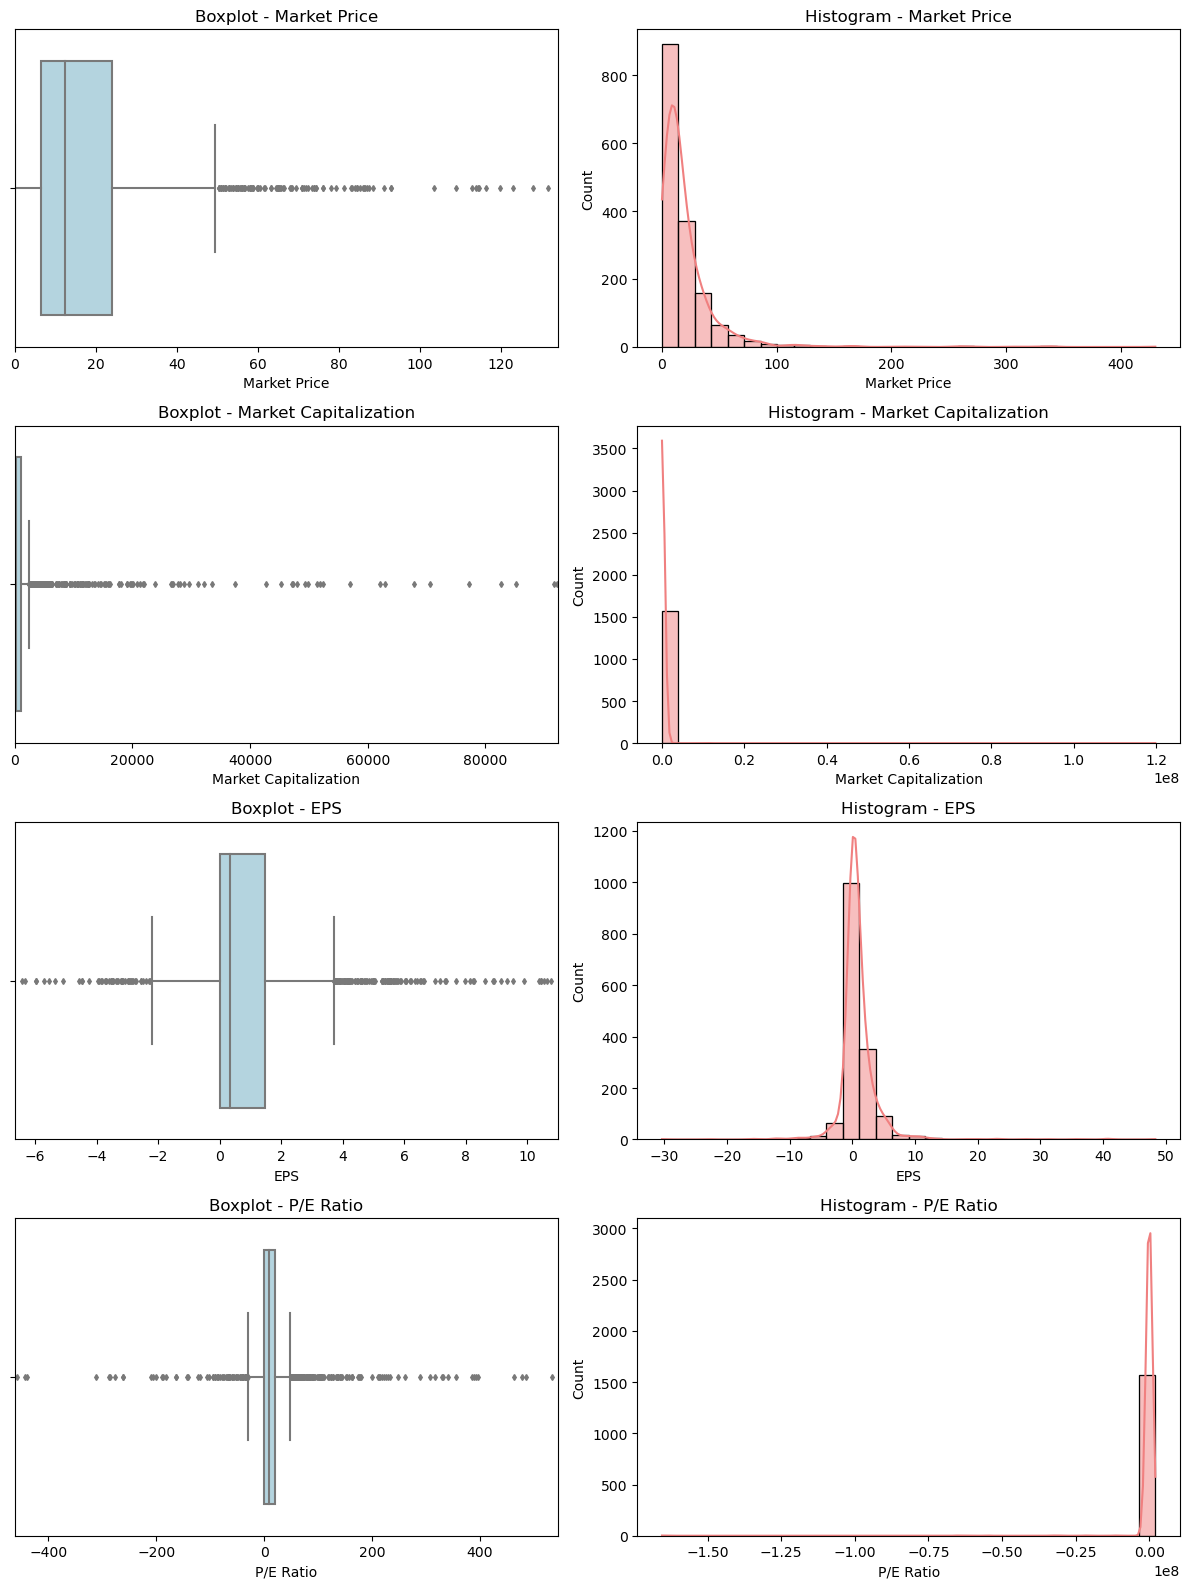

🧾 Found 4 categorical columns:

🔹 Column: 'Stock Symbol'
————————————————————————————————————————
🔹 Column: 'Company Name'
* Duplicate values in 'Company Name': ['Công ty Cổ phần Nam Việt', 'Công ty Cổ phần Xây dựng số 5']


,Stock Symbol,Company Name,Company Link,Trading Floor,Market Price,Market Capitalization,EPS,P/E Ratio
45,ANV,Công ty Cổ phần Nam Việt,https://cafef.vn/du-lieu/hose/anv-cong-ty-co-p...,HSX,14.3,1903.73,0.50,28.44
814,NAV,Công ty Cổ phần Nam Việt,https://cafef.vn/du-lieu/hose/nav-cong-ty-co-p...,HSX,18.0,144.00,2.12,8.49
1085,SC5,Công ty Cổ phần Xây dựng số 5,https://cafef.vn/du-lieu/hose/sc5-cong-ty-co-p...,HSX,18.0,269.70,1.55,11.62
1393,VC5,Công ty Cổ phần Xây dựng số 5,https://cafef.vn/du-lieu/upcom/vc5-cong-ty-co-...,UpCom,0.7,3.50,-3.31,-0.21


————————————————————————————————————————
🔹 Column: 'Company Link'
————————————————————————————————————————
🔹 Column: 'Trading Floor'
————————————————————————————————————————


In [10]:
inspect_num(df_symbol, plot_cols=2) 
inspect_cat(df_symbol, check_duplicates_in=['Stock Symbol', 'Company Name'])


**Numerical Variables**
- **Market Price** and **Market Capitalization** are highly right-skewed, indicating most stocks are small-cap with a few extremely large-cap outliers.
- **EPS** has a fairly normal distribution but contains noticeable outliers on both the negative and positive ends.
- **P/E Ratio** shows extreme values, including negative and inflated values due to near-zero or negative EPS.
- These outliers distort the scale in visualizations, making it harder to interpret the central trend.

**Categorical Variable:**
- *Missing Value*: One record has a missing company name → `Stock Symbol: VTT`.
- *Duplicate Values*: Two company names appear more than once:
  - `Công ty Cổ phần Nam Việt`
  - `Công ty Cổ phần Xây dựng số 5`
- Each duplicate is tied to a unique stock symbol, suggesting separate listings rather than data entry issues.


In [11]:
df_symbol_filtered = df_symbol[
    (df_symbol['Market Capitalization'] > 0) | 
    (df_symbol['Market Price'] > 0)
].copy()


We filtered out all companies with either a market capitalization or market price equal to zero, as these values are not economically meaningful and may indicate data entry errors or inactive listings. After clean, the data table retained 1536 stock symbols valid.

In [12]:
df_symbol_filtered

,Stock Symbol,Company Name,Company Link,Trading Floor,Market Price,Market Capitalization,EPS,P/E Ratio
0,A32,Công ty cổ phần 32,https://cafef.vn/du-lieu/upcom/a32-cong-ty-co-...,UpCom,37.00,2516.00,2.57,14.38
1,AAA,Công ty Cổ phần Nhựa An Phát Xanh,https://cafef.vn/du-lieu/hose/aaa-cong-ty-co-p...,HSX,7.40,2828.83,0.18,40.53
2,AAH,Công ty cổ phần Hợp Nhất,https://cafef.vn/du-lieu/upcom/aah-cong-ty-co-...,UpCom,4.00,0.00,0.00,0.00
3,AAM,Công ty Cổ phần Thủy sản Mekong,https://cafef.vn/du-lieu/hose/aam-cong-ty-co-p...,HSX,6.90,72.11,0.73,9.49
4,AAS,Công ty cổ phần Chứng khoán SmartInvest,https://cafef.vn/du-lieu/upcom/aas-cong-ty-co-...,UpCom,7.30,1460.00,1.99,3.67
...,...,...,...,...,...,...,...,...
1567,XPH,Công ty Cổ phần Xà phòng Hà Nội,https://cafef.vn/du-lieu/upcom/xph-cong-ty-co-...,UpCom,7.00,111.68,1.03,8.38
1568,YBC,Công ty Cổ phần Xi măng và Khoáng sản Yên Bái,https://cafef.vn/du-lieu/upcom/ybc-cong-ty-co-...,UpCom,16.60,195.45,-2.29,-7.25
1569,YBM,Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái,https://cafef.vn/du-lieu/hose/ybm-cong-ty-co-p...,HSX,17.90,265.51,0.86,20.82
1570,YEG,Công ty Cổ phần Tập đoàn Yeah1,https://cafef.vn/du-lieu/hose/yeg-cong-ty-co-p...,HSX,11.95,365.19,0.07,174.83


##### b. Daily Trading Data  `stock_summary.csv`



In [13]:
#Convert Object to Numeric
df_summary['Highest Price'] = pd.to_numeric(df_summary['Highest Price'].str.replace(',', ''), errors='coerce')
df_summary['Reference Price'] = pd.to_numeric(df_summary['Reference Price'].str.replace(',', ''), errors='coerce')  
df_summary['Lowest Price'] = pd.to_numeric(df_summary['Lowest Price'].str.replace(',', ''), errors='coerce')
df_summary['Volume'] = pd.to_numeric(df_summary['Volume'].str.replace(',', ''), errors='coerce')

🔍 First 5 Rows:


,Stock Symbol,Highest Price,Reference Price,Lowest Price,Volume
0,ABB,7.90,7.90,7.70,1491600.0
1,ABC,12.00,11.70,11.40,14600.0
2,AAS,8.50,8.60,8.40,399500.0
3,AAH,4.10,4.10,4.00,1590200.0
4,AAA,8.51,8.42,8.42,1494000.0



📊 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Stock Symbol     1567 non-null   object 
 1   Highest Price    1567 non-null   float64
 2   Reference Price  1567 non-null   float64
 3   Lowest Price     1567 non-null   float64
 4   Volume           1566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.3+ KB


None


🔁 Duplicate Rows Count:
0

❓ Missing Values Count:
Stock Symbol       0
Highest Price      0
Reference Price    0
Lowest Price       0
Volume             1
dtype: int64

📈 Descriptive Statistics:


,Highest Price,Reference Price,Lowest Price,Volume
count,1567.000000,1567.000000,1567.000000,1.566000e+03
mean,21.848175,21.685418,21.430466,4.416607e+05
std,30.926230,30.171257,30.137328,2.046462e+06
min,0.000000,0.000000,0.000000,0.000000e+00
1%,0.000000,0.500000,0.000000,0.000000e+00
25%,7.100000,7.100000,7.000000,0.000000e+00
50%,13.100000,13.200000,13.000000,1.400000e+03
75%,26.000000,25.800000,25.550000,4.552500e+04
99%,141.768000,141.172000,139.258000,9.329470e+06
max,359.000000,357.100000,357.100000,3.401310e+07



📊 Boxplot & Histogram per Numeric Feature:


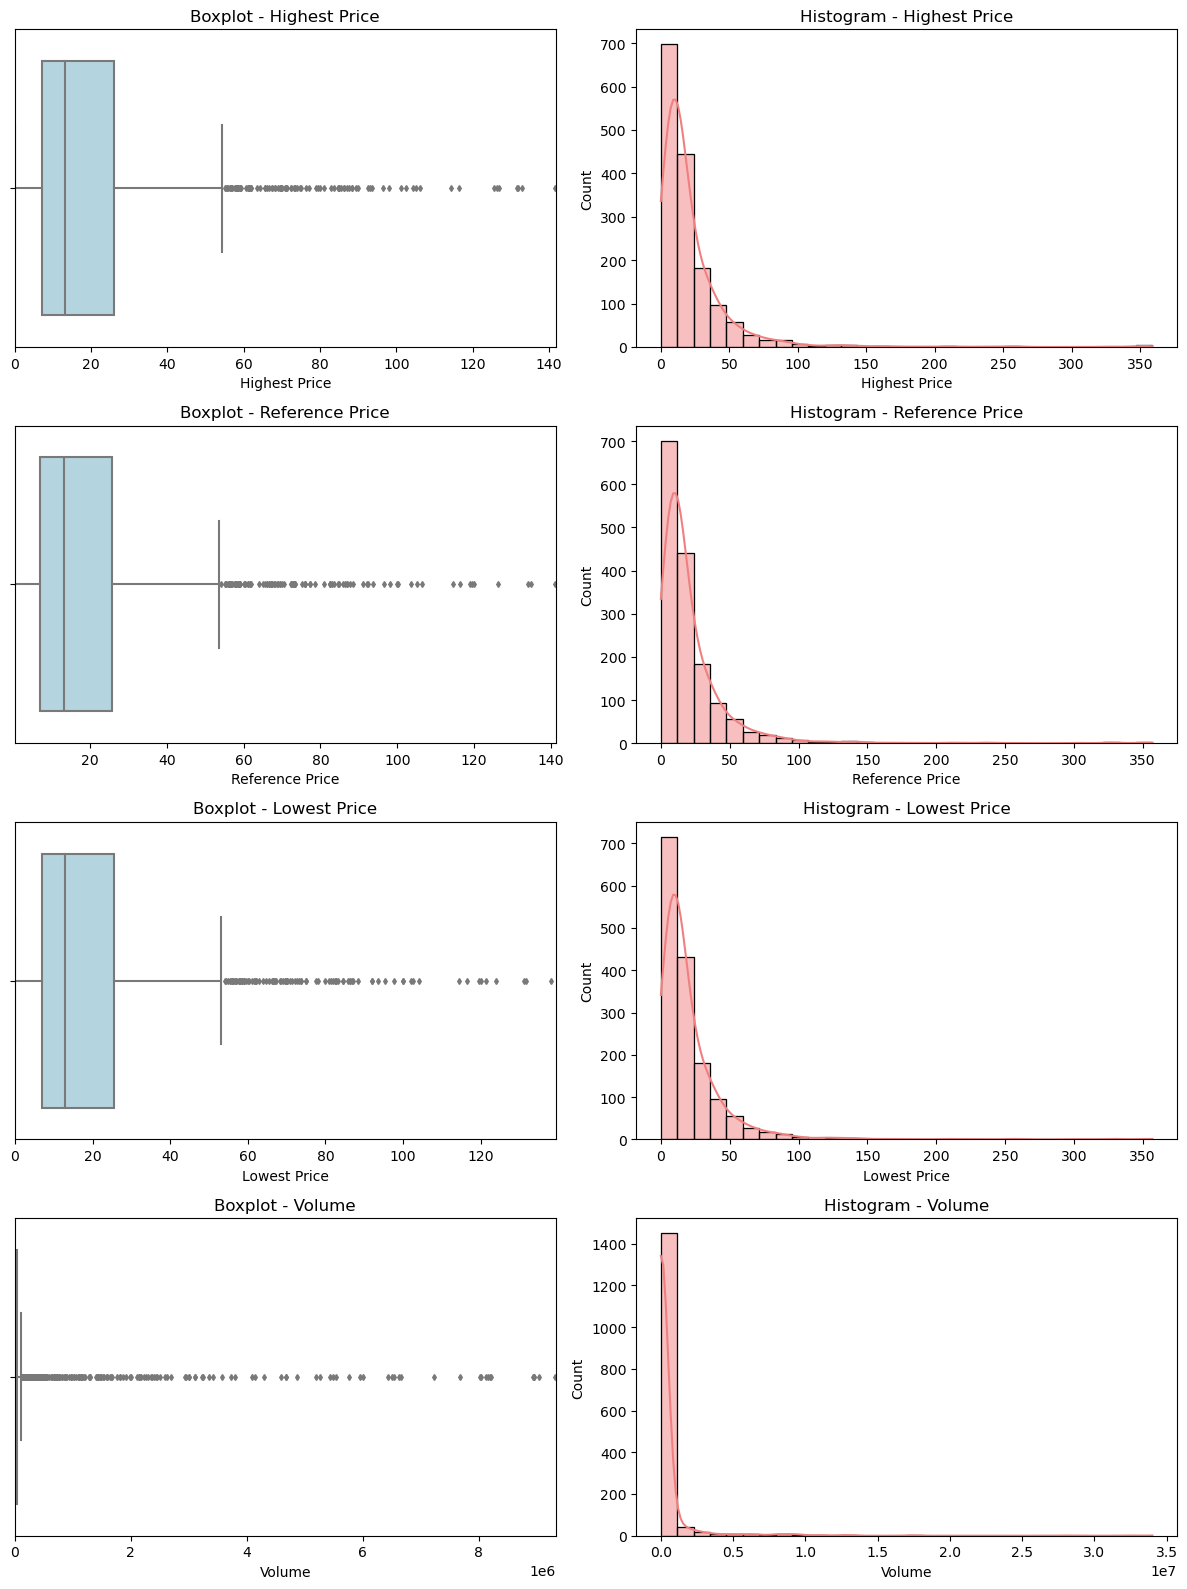

In [14]:
inspect_overview(df_summary)
inspect_num(df_summary, plot_cols=2)

- **Price-related columns** (`Highest Price`, `Reference Price`, `Lowest Price`) all show strong right-skewness and contain outliers, as seen in both boxplots and histograms.
- A small portion of stocks have **price values = 0**, which may indicate suspended or delisted stocks.
- **Volume** is highly skewed, with most stocks trading low volumes while a few exhibit extremely high activity. One missing value was detected in the `Volume` column.
- No duplicate rows were found, and overall data quality is high aside from minor issues noted.


##### c. Historical Financial Data - `financial_data.csv`

In [15]:
inspect_overview(df_financial)

🔍 First 5 Rows:


,Stock Symbol,Metric,2023,2022,2021,2020,2019,2024
0,ABB,PB Ratio,0.63 (lần),0.61 (lần),0.52 (lần),0.72 (lần),0.58 (lần),NaN
1,ABB,Debt to Equity Ratio,"1,143.32%","1,102.59%",897.03%,931.09%,"1,205.83%",NaN
2,ABB,ROA,0.01%,0.28%,1.04%,1.29%,0.96%,NaN
3,ABB,ROE,0.18%,3.36%,10.39%,13.30%,12.54%,NaN
4,ABB,Revenue Growth,-10.97%,28.23%,26.18%,-3.25%,2.43%,NaN



📊 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9402 entries, 0 to 9401
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Stock Symbol  9402 non-null   object
 1   Metric        9402 non-null   object
 2   2023          9126 non-null   object
 3   2022          9252 non-null   object
 4   2021          9264 non-null   object
 5   2020          9234 non-null   object
 6   2019          9120 non-null   object
 7   2024          6798 non-null   object
dtypes: object(8)
memory usage: 587.8+ KB


None


🔁 Duplicate Rows Count:
0

❓ Missing Values Count:
Stock Symbol       0
Metric             0
2023             276
2022             150
2021             138
2020             168
2019             282
2024            2604
dtype: int64


We cleaned and standardized the financial data by removing non-numeric characters (e.g., "%", "(lần)") and converting all values to decimal format. For each financial metric (e.g., ROE, ROA, PB Ratio), we calculated the average across six years (2019–2024) to smooth out year-to-year fluctuations. The resulting data was then reshaped into wide format, with each stock represented by a single row and each metric as a separate column—ready for ranking, analysis, or integration into scoring models.


In [16]:
year_cols = ['2019', '2020', '2021', '2022', '2023', '2024']
for idx, row in df_financial.iterrows():
    metric = row['Metric']
    for col in year_cols:
        val = row[col]
        if pd.isna(val):
            continue
        if metric == "PB Ratio":
            val_cleaned = val.replace(" (lần)", "").strip()
        else:
            val_cleaned = val.replace("%", "").strip()
            try:
                val_cleaned = float(val_cleaned) / 100 
            except ValueError:
                val_cleaned = None
        df_financial.at[idx, col] = val_cleaned

for col in year_cols:
    df_financial[col] = pd.to_numeric(df_financial[col], errors='coerce')
df_financial['Average'] = df_financial[year_cols].mean(axis=1, skipna=True)
df_avg_all_metrics = df_financial[['Stock Symbol', 'Metric', 'Average']]

# Convert to wide format
df_avg_all_metrics_wide = df_avg_all_metrics.pivot(index='Stock Symbol', columns='Metric', values='Average').reset_index()



📈 Descriptive Statistics:


Metric,Debt to Equity Ratio,PB Ratio,Profit Growth,ROA,ROE,Revenue Growth
count,1537.000000,1558.000000,1557.000000,1490.000000,1491.000000,1559.000000
mean,1.313307,1.093609,0.018649,0.056402,0.098882,0.090300
std,1.807162,3.582044,0.762404,0.070534,0.149733,0.333400
min,-8.751100,-61.633333,-4.848550,-0.504200,-1.769350,-1.050800
1%,-2.849319,-2.160850,-2.491364,0.000500,-0.145587,-0.938412
25%,0.372333,0.600000,-0.180920,0.018354,0.042800,-0.018500
50%,0.883133,0.856000,0.079433,0.041000,0.084200,0.054383
75%,1.831717,1.308333,0.317320,0.076088,0.142010,0.153133
99%,8.060307,5.768650,1.953518,0.249099,0.455720,1.562241
max,9.685700,89.152500,3.463950,1.527233,2.668167,2.483980



📊 Boxplot & Histogram per Numeric Feature:


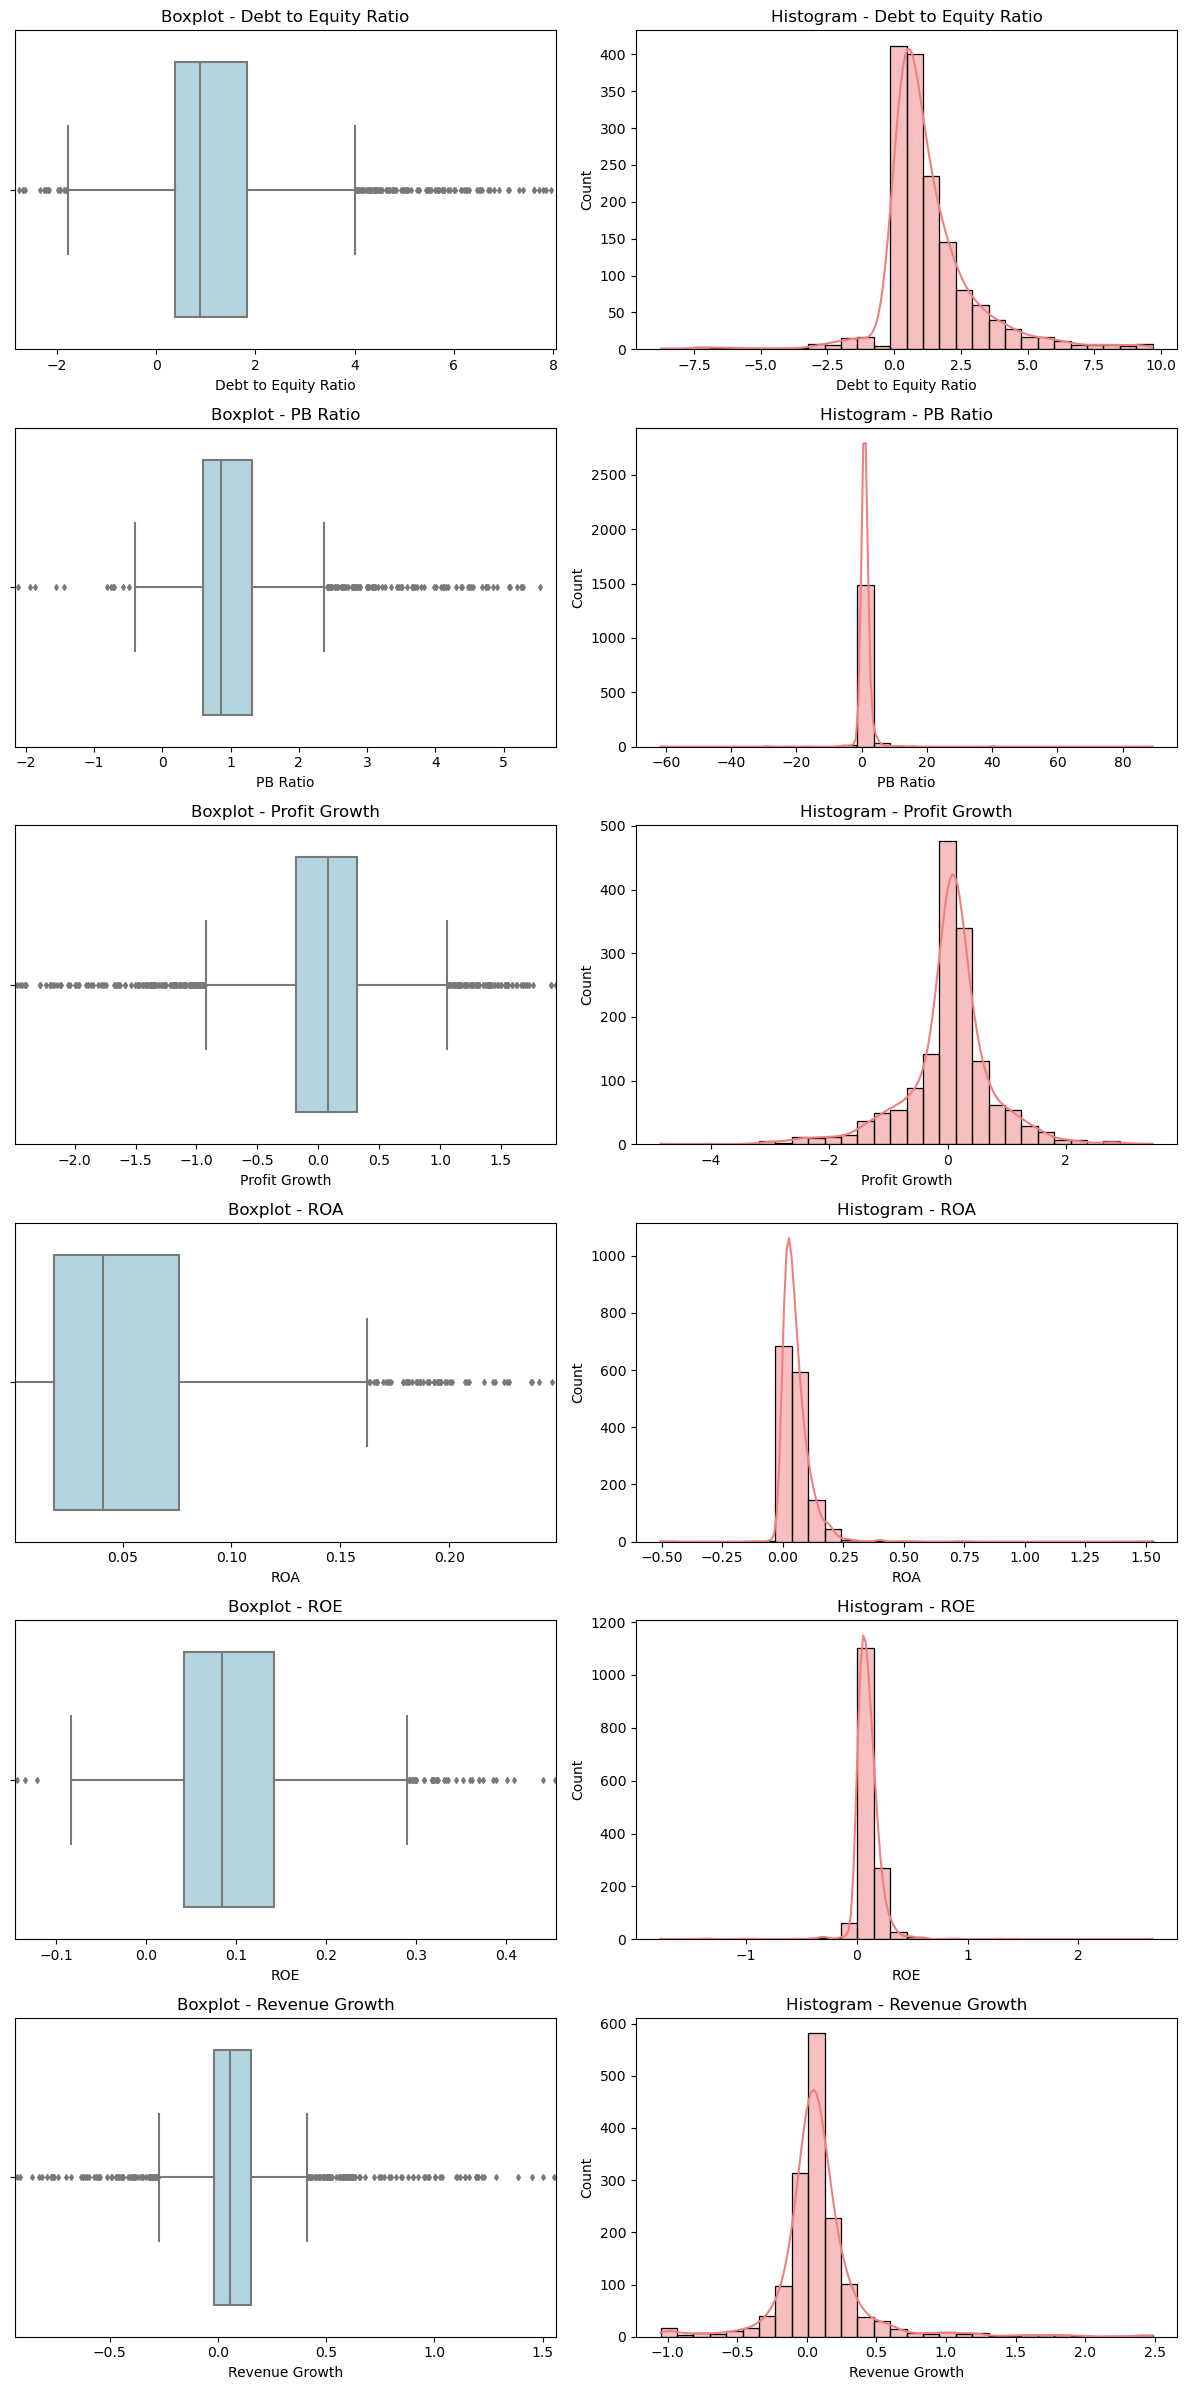

In [17]:
inspect_num(df_avg_all_metrics_wide)

- **Debt to Equity Ratio** and **PB Ratio** both exhibit extreme outliers on the high and low ends. Several firms report negative values, which are unusual and may indicate data issues or financial distress.
- **Profit Growth** shows a near-normal distribution centered around 0, but also includes significant negative outliers.
- **ROA** and **ROE** are positively skewed, with the majority of values clustering below 20%, reflecting modest profitability for most firms.
- **Revenue Growth** has a slight right skew, with most firms growing at modest rates. However, a few firms report extremely high or negative growth, indicating potential volatility.
- All metrics contain a small number of extreme outliers, which may impact downstream analysis or model performance if not treated.


##### d. Divident Historical Data - `event_data.csv`

In [18]:
inspect_overview(df_divident)
df_divident['Dividend Type'].dropna().unique()

🔍 First 5 Rows:


,No,Stock Symbol,Ex-Dividend Date,Dividend Type,Ratio,Note
0,1,NAV,03/04/2025,Cổ tức bằng tiền,Cash 5%,19.25 (LC) - 0.5 (1) = 18.75 (O)
1,2,ANT,03/04/2025,Chia/thưởng cổ phiếu,"Split-Bonus 10/1 (Volume + 10%, Ratio=0.10)",23.50 (LC) / 1 + 0.10 (2) = 21.36 (O)
2,3,HSG,02/04/2025,Cổ tức bằng tiền,Cash 5%,17.60 (LC) - 0.5 (1) = 17.10 (O)
3,4,TMW,02/04/2025,Cổ tức bằng tiền,Cash 10%,26.30 (LC) - 1 (1) = 25.30 (O)
4,5,KHS,31/03/2025,Cổ tức bằng tiền,Cash 15%,15.70 (LC) - 1.5 (1) = 14.20 (O)



📊 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16568 entries, 0 to 16567
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                16568 non-null  object
 1   Stock Symbol      16568 non-null  object
 2   Ex-Dividend Date  16568 non-null  object
 3   Dividend Type     16568 non-null  object
 4   Ratio             16568 non-null  object
 5   Note              16568 non-null  object
dtypes: object(6)
memory usage: 776.8+ KB


None


🔁 Duplicate Rows Count:
0

❓ Missing Values Count:
No                  0
Stock Symbol        0
Ex-Dividend Date    0
Dividend Type       0
Ratio               0
Note                0
dtype: int64


array(['Cổ tức bằng tiền', 'Chia/thưởng cổ phiếu', 'Phát hành cổ phiếu',
       'Chia/thưởng cổ phiếuPhát hành cổ phiếu',
       'Cổ tức bằng tiềnChia/thưởng cổ phiếu',
       'Cổ tức bằng tiềnPhát hành cổ phiếu', '',
       'Cổ tức bằng tiềnChia/thưởng cổ phiếuPhát hành cổ phiếu'],
      dtype=object)

Under `df_divident`, we focuses exclusively on “Cổ tức bằng tiền” (cash dividends) as they directly reflect a company's ability to generate and distribute real earnings to shareholders. By retaining only the most recent event per stock and standardizing the dividend ratio to decimal form, the data becomes suitable for consistent comparison and reliable dividend yield analysis—supporting the identification of financially strong, shareholder-focused firms.

In [19]:

df_divident['Stock Symbol'] = df_divident['Stock Symbol'].str.strip().str.upper()
df_divident['Ex-Dividend Date'] = pd.to_datetime(df_divident['Ex-Dividend Date'], dayfirst=True, errors='coerce')

# Filter for cash dividend events only
df_div_cash = df_divident[df_divident['Dividend Type'].str.contains("Cổ tức bằng tiền", na=False)].copy()

# Extract Year and Month
df_div_cash['Year'] = df_div_cash['Ex-Dividend Date'].dt.year

df_div_cash['Ratio'] = df_div_cash['Ratio'].str.extract(r'(\d+\.?\d*)').astype(float) / 100

# Aggregate total cash dividend per stock per year
df_div_cash['Dividend Label'] = df_div_cash['Year'].astype(str) + '_Cash Dividend'
df_div_cash_grouped = df_div_cash.groupby(['Stock Symbol', 'Dividend Label'])['Ratio'].sum().reset_index()

# Pivot to wide format
df_div_cash_wide = df_div_cash_grouped.pivot(index='Stock Symbol', columns='Dividend Label', values='Ratio').reset_index()

In [20]:
# Calculate average and cumulative dividend from 2019 to 2024
dividend_columns_recent = [f"{year}_Cash Dividend" for year in range(2019, 2025)]
for col in dividend_columns_recent:
    if col not in df_div_cash_wide.columns:
        df_div_cash_wide[col] = None
df_div_cash_wide['Average Dividend'] = df_div_cash_wide[dividend_columns_recent].mean(axis=1, skipna=True)
df_div_cash_wide['Accumulative Dividend'] = df_div_cash_wide[dividend_columns_recent].sum(axis=1, skipna=True)
# Retain only Stock Symbol, Average Dividend, and Total Dividend columns
df_dividend_summary = df_div_cash_wide[['Stock Symbol', 'Average Dividend', 'Accumulative Dividend']].copy()


In [21]:
df_dividend_summary

Dividend Label,Stock Symbol,Average Dividend,Accumulative Dividend
0,A32,0.296667,1.7800
1,AAA,0.050000,0.1500
2,AAM,0.050000,0.1500
3,AAT,0.065000,0.1300
4,AAV,0.100000,0.1000
...,...,...,...
1442,XMD,0.070000,0.1400
1443,XMP,0.105000,0.2100
1444,YBM,0.070000,0.3500
1445,YSC,NaN,0.0000


### 4.3. Final Dataset Construction

The final merged dataset combined:

- **Static metadata** from CafeF (e.g., stock symbol, market cap, EPS)
- **Daily trading summaries** (e.g., volume, high/low prices)
- **Financial indicators** (e.g., ROA, ROE, PB ratio, Debt-to-Equity)
- **Dividend payouts** (average and cumulative 2019–2024)

The merged dataset includes 1,511 stocks and 20+ curated variables. All missing values were handled appropriately, and duplicates were resolved using unique identifiers (stock symbol).


In [22]:
#Merging all dataframes ---
df_merged = df_symbol_filtered.merge(df_summary, on='Stock Symbol', how='left')
df_merged = df_merged.merge(df_avg_all_metrics_wide, on='Stock Symbol', how='left')
df_merged = df_merged.merge(df_dividend_summary, on='Stock Symbol', how='left')

#Save to CSV and Pickle in 'output_files' folder ---
output_folder = "output_files"
csv_path = os.path.join(output_folder, "df_stocks_vn.csv")
pkl_path = os.path.join(output_folder, "df_stocks_vn.pkl")

df_merged.to_csv(csv_path, index=False, encoding='utf-8')
df_merged.to_pickle(pkl_path)

print(f"✅ Merged DataFrame saved to:\n- CSV: {csv_path}\n- Pickle: {pkl_path}")


✅ Merged DataFrame saved to:
- CSV: output_files\df_stocks_vn.csv
- Pickle: output_files\df_stocks_vn.pkl


In [23]:
inspect_overview(df_merged)

🔍 First 5 Rows:


,Stock Symbol,Company Name,Company Link,Trading Floor,Market Price,Market Capitalization,EPS,P/E Ratio,Highest Price,Reference Price,Lowest Price,Volume,Debt to Equity Ratio,PB Ratio,Profit Growth,ROA,ROE,Revenue Growth,Average Dividend,Accumulative Dividend
0,A32,Công ty cổ phần 32,https://cafef.vn/du-lieu/upcom/a32-cong-ty-co-...,UpCom,37.0,2516.00,2.57,14.38,37.50,37.50,37.50,0.0,1.206167,0.783333,-0.030060,0.080717,0.175883,0.012600,0.296667,1.78
1,AAA,Công ty Cổ phần Nhựa An Phát Xanh,https://cafef.vn/du-lieu/hose/aaa-cong-ty-co-p...,HSX,7.4,2828.83,0.18,40.53,8.51,8.42,8.42,1494000.0,1.052500,0.668333,0.317217,0.030433,0.065183,0.121450,0.050000,0.15
2,AAH,Công ty cổ phần Hợp Nhất,https://cafef.vn/du-lieu/upcom/aah-cong-ty-co-...,UpCom,4.0,0.00,0.00,0.00,4.10,4.10,4.00,1590200.0,1.497383,2.610000,-1.340000,0.033167,0.037333,0.751840,NaN,NaN
3,AAM,Công ty Cổ phần Thủy sản Mekong,https://cafef.vn/du-lieu/hose/aam-cong-ty-co-p...,HSX,6.9,72.11,0.73,9.49,7.00,6.87,6.88,22200.0,0.053533,0.433333,-2.901440,0.029550,0.031175,0.000450,0.050000,0.15
4,AAS,Công ty cổ phần Chứng khoán SmartInvest,https://cafef.vn/du-lieu/upcom/aas-cong-ty-co-...,UpCom,7.3,1460.00,1.99,3.67,8.50,8.60,8.40,399500.0,0.625717,0.646667,-0.359500,0.074950,0.108700,0.650133,NaN,NaN



📊 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           1569 non-null   object 
 1   Company Name           1569 non-null   object 
 2   Company Link           1569 non-null   object 
 3   Trading Floor          1569 non-null   object 
 4   Market Price           1569 non-null   float64
 5   Market Capitalization  1569 non-null   float64
 6   EPS                    1569 non-null   float64
 7   P/E Ratio              1569 non-null   float64
 8   Highest Price          1566 non-null   float64
 9   Reference Price        1566 non-null   float64
 10  Lowest Price           1566 non-null   float64
 11  Volume                 1565 non-null   float64
 12  Debt to Equity Ratio   1536 non-null   float64
 13  PB Ratio               1557 non-null   float64
 14  Profit Growth          1556 non-null 

None


🔁 Duplicate Rows Count:
0

❓ Missing Values Count:
Stock Symbol               0
Company Name               0
Company Link               0
Trading Floor              0
Market Price               0
Market Capitalization      0
EPS                        0
P/E Ratio                  0
Highest Price              3
Reference Price            3
Lowest Price               3
Volume                     4
Debt to Equity Ratio      33
PB Ratio                  12
Profit Growth             13
ROA                       80
ROE                       79
Revenue Growth            11
Average Dividend         502
Accumulative Dividend    274
dtype: int64


### 4.4. Example Usage: Stock Portfolio Score-based Model

This section demonstrates how scraped stock data can be transformed into a practical investment tool through the development of a score-based portfolio selection model. By integrating core financial indicators into a composite scoring framework, this model aims to support screening and ranking of Vietnamese stocks based on value, growth, profitability, risk, and income potential.

Instead of rigid filtering, we adopt a flexible scoring system where each stock receives a composite score based on its adherence to investment-worthy traits. This allows for nuanced differentiation between stocks while maintaining a comprehensive evaluation approach.




##### Step 1: Define Scoring Criteria

| Criterion              | Rule                      | Weight | Rationale                            |
|------------------------|---------------------------|--------|----------------------------------------|
| Stock Price            | ≥ 10,000 VND              | 0.6    | Avoid penny stocks                     |
| P/B Ratio              | ≤ 1.5                     | 1.0    | Capture undervaluation                 |
| P/E Ratio              | ≤ 12                      | 1.0    | Favor reasonable valuation             |
| Dividend Yield         | ≥ 4.5%                    | 0.8    | Ensure passive income                  |
| ROE                   | ≥ 12%                     | 1.2    | Highlight strong profitability         |
| Revenue Growth         | ≥ 15%                     | 1.0    | Identify expanding firms               |
| EPS                   | < 2                       | 0.8    | Ensure earnings stability              |
| Debt to Equity Ratio   | ≤ 1.5                     | 1.0    | Control financial risk                 |
| Trading Volume         | ≥ 300 shares/day          | 0.6    | Secure liquidity for execution         |



#### Step 2: Apply Scoring Model

In [24]:
from sklearn.preprocessing import MinMaxScaler

def add_score(df, condition, weight=1):
    return df["Score"] + weight * condition.astype(int)

df_score = df_merged.copy()
df_score["Score"] = 0

# Apply weighted score conditions
df_score["Score"] = add_score(df_score, df_score["Market Price"] >= 10000, 0.6)
df_score["Score"] = add_score(df_score, df_score["PB Ratio"] <= 1.5, 1.0)
df_score["Score"] = add_score(df_score, df_score["P/E Ratio"] <= 12, 1.0)
df_score["Score"] = add_score(df_score, df_score["Average Dividend"] >= 0.045, 0.8)
df_score["Score"] = add_score(df_score, df_score["ROE"] >= 0.12, 1.2)
df_score["Score"] = add_score(df_score, df_score["Revenue Growth"] >= 0.15, 1.0)
df_score["Score"] = add_score(df_score, df_score["EPS"] < 2, 0.8)
df_score["Score"] = add_score(df_score, df_score["Debt to Equity Ratio"] <= 1.5, 1.0)
df_score["Score"] = add_score(df_score, df_score["Volume"] >= 300, 0.6)

# Normalize to 0–100 scale
scaler = MinMaxScaler((0, 100))
df_score["Score (0-100)"] = scaler.fit_transform(df_score[["Score"]])

#### Step 3: Categorize Score Groups

Each stock is then assigned to a category based on its normalized score

| Score Range | Group Name               | Description                                  |
|-------------|--------------------------|----------------------------------------------|
| 85–100      | Elite Picks              | Highest quality, strong fundamentals         |
| 70–84       | Quality Growth           | Solid candidates with growth and value       |
| 50–69       | Moderate Potential       | Decent but with some weaknesses              |
| 30–49       | Speculative Watchlist    | Risky, possible upside with volatility       |
| <30         | Low Quality              | Weak fundamentals, typically avoided         |


In [25]:
def assign_score_group(score):
    if score >= 85:
        return "A.Elite Picks"
    elif score >= 70:
        return "B.Quality Growth"
    elif score >= 50:
        return "C.Moderate Potential"
    elif score >= 30:
        return "D.Speculative Watchlist"
    else:
        return "E.Low Quality"

df_score["Score Group"] = df_score["Score (0-100)"].apply(assign_score_group)


#### Step 4: Visualizations

Two visualizations were created:

1. `Column Chart` showing distribution of stocks per group, which clearly reveals a bell-curve shape with a middle-tier concentration.

2. `Radar Chart` comparing the average financial profiles of Quality Growth and Elite Picks stocks. Metrics include ROE, P/E, P/B, Revenue Growth, Debt-to-Equity, and Dividend Yield.

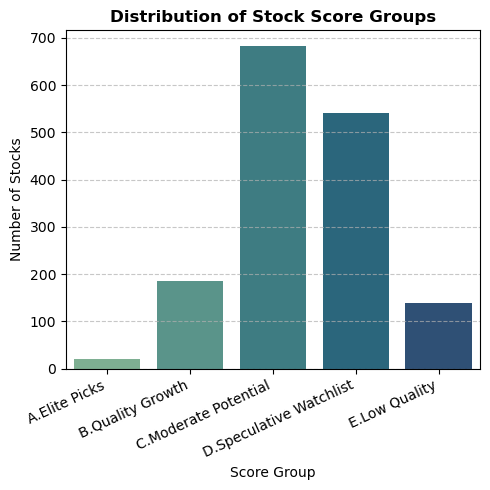

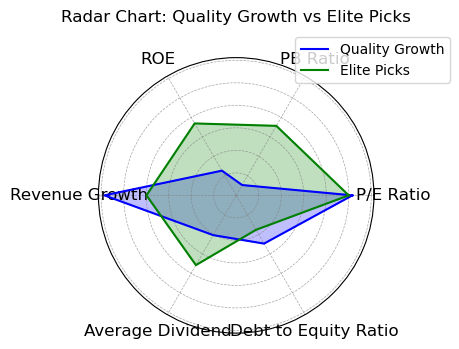

In [26]:
# Group count data (sorted by label prefix for clarity)
group_counts = df_score["Score Group"].value_counts().sort_index().reset_index()
group_counts.columns = ["Score Group", "Count"]

# Bar chart
plt.figure(figsize=(5, 5))
sns.barplot(data=group_counts, x="Score Group", y="Count", palette="crest")

plt.title("Distribution of Stock Score Groups", fontsize=12, weight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Score Group", fontsize=10)
plt.ylabel("Number of Stocks", fontsize=10)
plt.xticks(rotation=25, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Radar chart comparison
radar_metrics = {
    "P/E Ratio": "low",
    "PB Ratio": "low",
    "ROE": "high",
    "Revenue Growth": "high",
    "Average Dividend": "high",
    "Debt to Equity Ratio": "low"
}

def prep_radar(df):
    df_radar = df[list(radar_metrics.keys())].copy()
    for col, direction in radar_metrics.items():
        if direction == "low":
            df_radar[col] = 1 / (df_radar[col] + 1e-6)
    return (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

# Filter and compute mean values
df_quality = df_score[df_score["Score Group"] == "B.Quality Growth"]
df_elite = df_score[df_score["Score Group"] == "A.Elite Picks"]
norm_quality = prep_radar(df_quality).mean().values
norm_elite = prep_radar(df_elite).mean().values

# Plot radar chart
labels = list(radar_metrics.keys())
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
values_quality = np.concatenate([norm_quality, [norm_quality[0]]])
values_elite = np.concatenate([norm_elite, [norm_elite[0]]])

plt.figure(figsize=(5, 5))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values_quality, label='Quality Growth', color='blue')
ax.fill(angles, values_quality, color='blue', alpha=0.25)

ax.plot(angles, values_elite, label='Elite Picks', color='green')
ax.fill(angles, values_elite, color='green', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels([])
ax.set_title("Radar Chart: Quality Growth vs Elite Picks", y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 5: Insights
- Very few stocks achieved Elite status, reinforcing the strictness of high-quality standards.
- Quality Growth group demonstrated strong fundamentals with moderate valuation.
- Most stocks fall into Moderate or Speculative tiers, indicating broad market inconsistency in fundamentals.

#### Conclusion

The score-based model bridges raw financial data and actionable investment decisions. It allows ranking, segmentation, and portfolio construction grounded in financial theory. The flexibility of this method enables adaptation to different investment strategies or market conditions, making it a useful tool for both individual investors and institutional research.

This model is also extensible; technical indicators (e.g., SMA50/SMA200, RSI) and macroeconomic overlays can be integrated in future iterations to enhance predictive performance.

## 5. Summary and Future Directions
### Key Limitations
**Sensitive to Website Changes**
Our scraper depends heavily on the specific structure of third-party financial websites. If those websites update their layout or class names, the extraction process breaks and needs manual fixes.

**Heavy on System Resources**
Each stock symbol requires its own Selenium WebDriver, which, although accurate, is quite resource-intensive. This makes it hard to scale the system on machines with limited processing power or memory.

**Gaps in Source Data**
Some companies, especially smaller or newer ones, don’t report complete financial data. This leads to gaps or skewed metrics in the final dataset, which can affect the quality of any analysis based on it.

### Future Work
- Automate regular updates with scheduling tools like cron or Airflow
- Enrich the dataset with new types of data—like news sentiment, ESG scores, or even macroeconomic indicators
- Build a user-friendly Streamlit dashboard for real-time stock filtering and screening
- Broaden the scope to include data scraping for other markets, like the US or European exchanges

### Reflection
This project marked a successful attempt at automating the process of extracting, cleaning, and combining Vietnamese stock market data using a hybrid web scraping approach. The end result is a rich dataset that can support deeper financial analysis, smarter investment screening, and more advanced quantitative modeling.

But beyond the technical outcome, this project was a meaningful learning journey. It wasn’t just about writing code—it was about applying data science skills to solve a real-world problem. We learned how to build scalable and reliable data pipelines, how to deal with messy and inconsistent data, and how to navigate around challenges like anti-scraping mechanisms. It also pushed us to think critically about financial metrics—how they're calculated, and how they can actually guide investment decisions.

Looking back, this experience went far beyond the technical. It was an exercise in design thinking, resilience, and ethical data handling. We faced setbacks, adapted our approach, and ultimately built something practical out of unstructured, real-world data. It gave us a clearer picture of what data engineering and financial analysis look like in practice—not just in theory.


## 6. References

- CafeF. (n.d.). *Vietnamese Stock Market Screener*. Retrieved April 2025, from [https://cafef.vn/du-lieu/screener.aspx](https://cafef.vn/du-lieu/screener.aspx)

- Cophieu68. (n.d.). *Stock Quotes and Financial Reports*. Retrieved April 2025, from [https://www.cophieu68.vn](https://www.cophieu68.vn)

- Mitchell, R. (2018). *Web Scraping with Python: Collecting More Data from the Modern Web* (2nd ed.). O’Reilly Media.
- Mehta, A. (2021). *Hands-On Web Scraping with Python*. Packt Publishing.
- Python Software Foundation. (n.d.). *concurrent.futures — Launching parallel tasks*. Python 3.x documentation. Retrieved from [https://docs.python.org/3/library/concurrent.futures.html](https://docs.python.org/3/library/concurrent.futures.html)
- Investopedia. (n.d.). *Financial Ratios You Should Know*. Retrieved from [https://www.investopedia.com](https://www.investopedia.com)
- McKinney, W. (2017). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython* (2nd ed.). O’Reilly Media.
- Munzert, S., Rubba, C., Meißner, P., & Nyhuis, D. (2015). *Automated Data Collection with R: A Practical Guide to Web Scraping and Text Mining*. Wiley.
- Piotroski, J. D. (2000). *Value Investing: The Use of Historical Financial Statement Information to Separate Winners from Losers*. *Journal of Accounting Research*, 38, 1–41.
- van Rossum, G., & Drake, F. L. (2009). *The Python Language Reference Manual*. Network Theory Ltd.
